In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_theme(color_codes=True)
import math

In [2]:
df=pd.read_csv("corrected_data.csv")
df

,id,time_system_ts,x,y,accuracy,speed,altitude,time_diff,end_x,end_y,prev_time_diff
0,83250363,2014-06-30 00:00:26,26.692247,58.352892,41.0,1.75,40.5000,12.0,26.692482,58.352700,NaN
1,83250364,2014-06-30 00:00:38,26.692482,58.352700,44.0,0.00,44.9000,1.0,26.692479,58.352701,12.0
2,83250365,2014-06-30 00:00:39,26.692479,58.352701,42.0,0.00,44.9000,1.0,26.692477,58.352701,1.0
3,83250366,2014-06-30 00:00:40,26.692477,58.352701,39.0,0.00,44.9000,1.0,26.692478,58.352701,1.0
4,83250367,2014-06-30 00:00:41,26.692478,58.352701,38.0,0.00,44.9000,1.0,26.692477,58.352701,1.0
...,...,...,...,...,...,...,...,...,...,...,...
243138,236300427,2015-08-31 23:20:26,26.722277,58.374617,12.0,0.00,80.7324,1.0,26.722317,58.374524,1.0
243139,236300428,2015-08-31 23:20:27,26.722317,58.374524,12.0,0.00,79.6099,1.0,26.722317,58.374524,1.0
243140,236300429,2015-08-31 23:20:28,26.722317,58.374524,32.0,0.00,86.5748,1.0,26.722317,58.374524,1.0
243141,236300430,2015-08-31 23:20:29,26.722317,58.374524,16.0,0.00,88.8012,1.0,26.722317,58.374524,1.0


In [3]:
stops=pd.read_csv("stops_gps.csv")
stops

,millis_start,millis_end,duration_millis,lng,lat,radius,start_time,end_time
0,1407093656000,1407135850000,42194000.0,26.718275,58.375641,24.898721,2014-08-03 19:20:56,2014-08-04 07:04:10
1,1409454256000,1409455072000,816000.0,26.718065,58.376405,21.597098,2014-08-31 03:04:16,2014-08-31 03:17:52
2,1408645913999,1408686681000,40767001.0,26.717627,58.376167,20.642175,2014-08-21 18:31:53,2014-08-22 05:51:21
3,1409460194000,1409460780000,586000.0,26.717810,58.376394,8.485813,2014-08-31 04:43:14,2014-08-31 04:53:00
4,1408824298000,1408825478000,1180000.0,26.718320,58.375961,7.806310,2014-08-23 20:04:58,2014-08-23 20:24:38
...,...,...,...,...,...,...,...,...
1026,1440510633761,1440513873888,3240127.0,26.721784,58.376631,13.937387,2015-08-25 13:50:33,2015-08-25 14:44:33
1027,1440420925583,1440426054139,5128556.0,24.798316,59.416362,34.718811,2015-08-24 12:55:25,2015-08-24 14:20:54
1028,1438076396999,1438080880763,4483764.0,26.734501,58.462023,35.478032,2015-07-28 09:39:56,2015-07-28 10:54:40
1029,1439050887207,1439054637684,3750477.0,26.734534,58.461912,22.280304,2015-08-08 16:21:27,2015-08-08 17:23:57


In [4]:
stops.sort_values(by="duration_millis",ascending=False).head(10)

,millis_start,millis_end,duration_millis,lng,lat,radius,start_time,end_time
10,1406824920000,1406890091000,65171000.0,26.716240,58.375423,92.589390,2014-07-31 16:42:00,2014-08-01 10:48:11
71,1408219221000,1408276759000,57538000.0,26.717821,58.375651,63.390305,2014-08-16 20:00:21,2014-08-17 11:59:19
251,1406414995000,1406470430000,55435000.0,26.717884,58.375513,30.878923,2014-07-26 22:49:55,2014-07-27 14:13:50
80,1409499210000,1409554252000,55042000.0,26.717762,58.375584,3.830633,2014-08-31 15:33:30,2014-09-01 06:50:52
880,1440270403000,1440325063823,54660823.0,26.127585,58.224284,16.278115,2015-08-22 19:06:43,2015-08-23 10:17:43
250,1407875996000,1407930485064,54489064.0,26.717355,58.375401,28.372622,2014-08-12 20:39:56,2014-08-13 11:48:05
249,1405016284000,1405070332000,54048000.0,26.717539,58.375217,15.451373,2014-07-10 18:18:04,2014-07-11 09:18:52
283,1409246746000,1409295983046,49237046.0,26.717867,58.376039,37.571794,2014-08-28 17:25:46,2014-08-29 07:06:23
78,1405616364000,1405665436000,49072000.0,26.717250,58.375508,30.124278,2014-07-17 16:59:24,2014-07-18 06:37:16
252,1406488788000,1406537645763,48857763.0,26.717304,58.375587,16.862945,2014-07-27 19:19:48,2014-07-28 08:54:05


In [5]:
df[df["speed"].apply(lambda x: int(x))==0][df[df["speed"].apply(lambda x: int(x))==0]["time_diff"]>1].sort_values(by="time_diff",ascending=False)

,id,time_system_ts,x,y,accuracy,speed,altitude,time_diff,end_x,end_y,prev_time_diff
113823,105426036,2014-08-19 05:51:35,26.718300,58.375532,43.0,0.0,81.2000,159443.0,26.718184,58.375490,1.0
59059,90142031,2014-07-19 15:33:22,24.361703,57.770894,36.0,0.0,24.2000,148871.0,24.512684,58.074698,18.0
103094,105394998,2014-08-09 01:52:41,26.717866,58.375638,41.0,0.0,72.9000,92442.0,26.718386,58.375655,17.0
114861,105427075,2014-08-23 00:17:25,26.717710,58.375325,24.0,0.0,76.0000,92140.0,26.718188,58.375562,22.0
102981,105389807,2014-08-07 03:13:14,26.717792,58.375496,51.0,0.0,86.9000,90710.0,26.717330,58.375371,21.0
...,...,...,...,...,...,...,...,...,...,...,...
26794,86129647,2014-07-07 18:17:02,26.717491,58.375047,22.0,0.0,102.1000,2.0,26.717492,58.375048,1.0
154314,215794692,2015-07-22 16:34:36,26.729619,58.380296,64.0,0.0,309.4030,2.0,26.729619,58.380296,1.0
214698,232227659,2015-08-22 22:26:15,26.127777,58.224305,16.0,0.0,54.9712,2.0,26.127777,58.224305,1.0
154237,215749721,2015-07-22 14:36:51,26.723043,58.380141,8.0,0.0,69.9304,2.0,26.723043,58.380141,1.0


In [6]:
df[df["speed"].apply(lambda x: int(x))==0].sort_values(by="time_diff",ascending=False).head(10)

,id,time_system_ts,x,y,accuracy,speed,altitude,time_diff,end_x,end_y,prev_time_diff
113823,105426036,2014-08-19 05:51:35,26.718300,58.375532,43.0,0.00,81.2,159443.0,26.718184,58.375490,1.0
59059,90142031,2014-07-19 15:33:22,24.361703,57.770894,36.0,0.00,24.2,148871.0,24.512684,58.074698,18.0
103094,105394998,2014-08-09 01:52:41,26.717866,58.375638,41.0,0.00,72.9,92442.0,26.718386,58.375655,17.0
114861,105427075,2014-08-23 00:17:25,26.717710,58.375325,24.0,0.00,76.0,92140.0,26.718188,58.375562,22.0
102981,105389807,2014-08-07 03:13:14,26.717792,58.375496,51.0,0.00,86.9,90710.0,26.717330,58.375371,21.0
26323,85687694,2014-07-06 00:34:43,26.717287,58.375463,46.0,0.25,112.4,83336.0,26.717395,58.375556,20.0
110281,105402204,2014-08-15 04:43:16,26.717608,58.375310,49.0,0.00,99.6,79903.0,26.717188,58.375329,16.0
29019,86207301,2014-07-07 23:45:22,26.717209,58.375333,10.0,0.00,83.6,71417.0,26.716868,58.375175,1.0
102860,105389491,2014-08-06 07:54:50,26.717832,58.375417,13.0,0.00,71.9,65619.0,26.717266,58.375073,1.0
26739,85937998,2014-07-07 00:29:48,26.717523,58.375391,27.0,0.75,90.6,63820.0,26.717205,58.375442,15.0


In [7]:
65171/60/60

18.103055555555557

In [8]:
159443/60/60

44.28972222222222

In [9]:
df.loc[113821:113825]

,id,time_system_ts,x,y,accuracy,speed,altitude,time_diff,end_x,end_y,prev_time_diff
113821,105426034,2014-08-19 05:51:33,26.718300,58.375532,28.0,0.0,81.2,1.0,26.718300,58.375532,1.0
113822,105426035,2014-08-19 05:51:34,26.718300,58.375532,29.0,0.0,81.2,1.0,26.718300,58.375532,1.0
113823,105426036,2014-08-19 05:51:35,26.718300,58.375532,43.0,0.0,81.2,159443.0,26.718184,58.375490,1.0
113824,105426037,2014-08-21 02:08:58,26.718184,58.375490,9.0,1.0,100.5,32.0,26.718626,58.375698,159443.0
113825,105426038,2014-08-21 02:09:30,26.718626,58.375698,29.0,1.0,96.5,1.0,26.718571,58.375725,32.0


In [10]:
df[df["speed"].apply(lambda x: int(x))==0]["time_diff"].sum()

7590204.0

In [11]:
sum(stops["duration_millis"]/1000)

5594040.528000006

In [12]:
df[df["x"]==df["end_x"]][df[df["x"]==df["end_x"]]["y"]==df[df["x"]==df["end_x"]]["end_y"]].sort_values(by="time_diff",ascending=False)

,id,time_system_ts,x,y,accuracy,speed,altitude,time_diff,end_x,end_y,prev_time_diff
136734,205505323,2015-07-11 08:24:47,26.722299,58.374580,24.0,0.0,73.7154,41.0,26.722299,58.374580,2.0
133282,205492714,2015-07-06 13:44:22,26.722390,58.374376,24.0,0.0,79.4901,28.0,26.722390,58.374376,2.0
141771,205528579,2015-07-14 01:50:01,26.722133,58.374457,16.0,0.0,71.0545,24.0,26.722133,58.374457,1.0
53716,90136687,2014-07-19 00:49:31,24.361576,57.770905,71.0,0.0,32.8000,22.0,24.361576,57.770905,23.0
241918,235593588,2015-08-30 10:40:08,26.722013,58.374580,24.0,0.0,80.9367,20.0,26.722013,58.374580,1.0
...,...,...,...,...,...,...,...,...,...,...,...
158773,216883396,2015-07-24 12:11:24,2.306920,48.854314,24.0,0.0,116.0680,0.0,2.306920,48.854314,2.0
158770,216883393,2015-07-24 12:11:21,2.306920,48.854314,24.0,0.0,117.1010,0.0,2.306920,48.854314,1.0
204780,231805286,2015-08-22 00:50:47,26.721470,58.381637,8.0,0.0,75.5509,0.0,26.721470,58.381637,1.0
189527,223736429,2015-08-07 23:49:12,26.722744,58.380246,6.0,0.0,66.9445,0.0,26.722744,58.380246,2.0


<h1> In general, the final corrected data looks ok, because there are no matches with coordinates from stops_gps.csv and time difference in rows where the location has not changed and speed = 0 is not significant (less than 10 minutes)</h1>

In [13]:
df["time_system_ts"]=pd.to_datetime(df["time_system_ts"])

In [14]:
df["time_system_ts"].sort_values(ascending=True)

0        2014-06-30 00:00:26
1        2014-06-30 00:00:38
2        2014-06-30 00:00:39
3        2014-06-30 00:00:40
4        2014-06-30 00:00:41
                 ...        
243138   2015-08-31 23:20:26
243139   2015-08-31 23:20:27
243140   2015-08-31 23:20:28
243141   2015-08-31 23:20:29
243142   2015-08-31 23:20:30
Name: time_system_ts, Length: 243143, dtype: datetime64[ns]

In [15]:
df

,id,time_system_ts,x,y,accuracy,speed,altitude,time_diff,end_x,end_y,prev_time_diff
0,83250363,2014-06-30 00:00:26,26.692247,58.352892,41.0,1.75,40.5000,12.0,26.692482,58.352700,NaN
1,83250364,2014-06-30 00:00:38,26.692482,58.352700,44.0,0.00,44.9000,1.0,26.692479,58.352701,12.0
2,83250365,2014-06-30 00:00:39,26.692479,58.352701,42.0,0.00,44.9000,1.0,26.692477,58.352701,1.0
3,83250366,2014-06-30 00:00:40,26.692477,58.352701,39.0,0.00,44.9000,1.0,26.692478,58.352701,1.0
4,83250367,2014-06-30 00:00:41,26.692478,58.352701,38.0,0.00,44.9000,1.0,26.692477,58.352701,1.0
...,...,...,...,...,...,...,...,...,...,...,...
243138,236300427,2015-08-31 23:20:26,26.722277,58.374617,12.0,0.00,80.7324,1.0,26.722317,58.374524,1.0
243139,236300428,2015-08-31 23:20:27,26.722317,58.374524,12.0,0.00,79.6099,1.0,26.722317,58.374524,1.0
243140,236300429,2015-08-31 23:20:28,26.722317,58.374524,32.0,0.00,86.5748,1.0,26.722317,58.374524,1.0
243141,236300430,2015-08-31 23:20:29,26.722317,58.374524,16.0,0.00,88.8012,1.0,26.722317,58.374524,1.0


In [16]:
#add time of the day in seconds
df["day_time_seconds"]=df["time_system_ts"].dt.hour*60*60+df["time_system_ts"].dt.minute*60+df["time_system_ts"].dt.second

In [17]:
#defining in which 5-minutes interval of the day is our time
df["5m_bottom_border_time"]=df["day_time_seconds"]//300*5
df["5m_top_border_time"]=(df["day_time_seconds"]//300+1)*5

In [18]:
df

,id,time_system_ts,x,y,accuracy,speed,altitude,time_diff,end_x,end_y,prev_time_diff,day_time_seconds,5m_bottom_border_time,5m_top_border_time
0,83250363,2014-06-30 00:00:26,26.692247,58.352892,41.0,1.75,40.5000,12.0,26.692482,58.352700,NaN,26,0,5
1,83250364,2014-06-30 00:00:38,26.692482,58.352700,44.0,0.00,44.9000,1.0,26.692479,58.352701,12.0,38,0,5
2,83250365,2014-06-30 00:00:39,26.692479,58.352701,42.0,0.00,44.9000,1.0,26.692477,58.352701,1.0,39,0,5
3,83250366,2014-06-30 00:00:40,26.692477,58.352701,39.0,0.00,44.9000,1.0,26.692478,58.352701,1.0,40,0,5
4,83250367,2014-06-30 00:00:41,26.692478,58.352701,38.0,0.00,44.9000,1.0,26.692477,58.352701,1.0,41,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243138,236300427,2015-08-31 23:20:26,26.722277,58.374617,12.0,0.00,80.7324,1.0,26.722317,58.374524,1.0,84026,1400,1405
243139,236300428,2015-08-31 23:20:27,26.722317,58.374524,12.0,0.00,79.6099,1.0,26.722317,58.374524,1.0,84027,1400,1405
243140,236300429,2015-08-31 23:20:28,26.722317,58.374524,32.0,0.00,86.5748,1.0,26.722317,58.374524,1.0,84028,1400,1405
243141,236300430,2015-08-31 23:20:29,26.722317,58.374524,16.0,0.00,88.8012,1.0,26.722317,58.374524,1.0,84029,1400,1405


In [19]:
df.groupby(by=["5m_bottom_border_time","5m_top_border_time"]).mean()

,,id,x,y,accuracy,speed,altitude,time_diff,end_x,end_y,prev_time_diff,day_time_seconds
5m_bottom_border_time,5m_top_border_time,,,,,,,,,,,
0,5,1.701863e+08,23.387326,57.095353,20.484187,9.668529,92.557475,12.069576,23.387448,57.095416,16545.171519,160.356736
5,10,1.744370e+08,22.015558,56.513026,18.029759,11.607747,91.087119,35.740034,22.015624,56.513093,14.330152,443.730488
10,15,1.685329e+08,22.239763,56.573857,16.507782,12.634319,93.528115,21.947193,22.239844,56.573942,25.160089,747.455253
15,20,1.605205e+08,22.674293,56.771279,15.044926,11.513828,89.112155,63.071287,22.674320,56.771335,39.409901,1043.982178
20,25,1.565783e+08,22.017696,56.532322,18.648279,7.128843,77.557549,29.254192,22.017666,56.532433,23.551633,1317.428950
...,...,...,...,...,...,...,...,...,...,...,...,...
1415,1420,1.455610e+08,21.545357,56.382298,21.718905,7.135530,78.502521,84.796849,21.545431,56.382267,66.906302,85056.755390
1420,1425,1.271310e+08,26.216407,58.265771,24.791626,9.191555,79.169863,37.659202,26.216493,58.265812,117.258033,85345.006816
1425,1430,1.513729e+08,25.878632,58.508344,18.761014,11.307969,75.527487,71.570241,25.878706,58.508366,16.327515,85655.809643


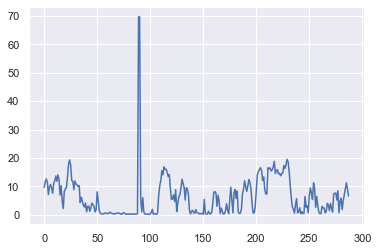

In [20]:
plt.plot(df.groupby(by=["5m_bottom_border_time","5m_top_border_time"]).mean()["speed"].values)

In [21]:
df.groupby(by=["5m_bottom_border_time","5m_top_border_time"]).median()

,,id,x,y,accuracy,speed,altitude,time_diff,end_x,end_y,prev_time_diff,day_time_seconds
5m_bottom_border_time,5m_top_border_time,,,,,,,,,,,
0,5,205435932.0,26.127469,58.146887,12.0,5.70245,83.6840,1.0,26.127469,58.146887,1.0,167.0
5,10,205436312.0,25.964616,58.056726,12.0,4.15752,85.4969,1.0,25.964616,58.056933,1.0,447.0
10,15,205436531.0,26.127535,58.122314,12.0,4.24913,88.7589,1.0,26.127535,58.122532,1.0,748.0
15,20,205436735.5,26.691482,58.238895,8.0,10.76160,78.9277,1.0,26.691482,58.239013,1.0,1036.0
20,25,205436939.0,26.693421,58.342932,15.0,3.28824,77.2106,1.0,26.693420,58.342934,1.0,1315.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1415,1420,90842853.5,26.341594,58.235413,13.0,3.46738,80.3946,1.0,26.341997,58.235224,1.0,85054.0
1420,1425,90843018.0,26.693020,58.358668,17.0,1.50000,79.9000,1.0,26.693020,58.358677,1.0,85346.0
1425,1430,91870123.0,26.530150,58.359845,15.0,9.91370,77.9529,1.0,26.530539,58.359952,1.0,85661.0


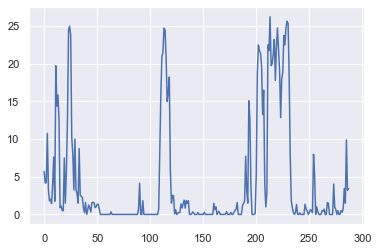

In [22]:
plt.plot(df.groupby(by=["5m_bottom_border_time","5m_top_border_time"]).median()["speed"].values)

In [23]:
df["weekday"]=df["time_system_ts"].dt.weekday
np.unique(df["weekday"])

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [24]:
working_days=df[df["weekday"]<5]
weekends=df[df["weekday"]>=5]

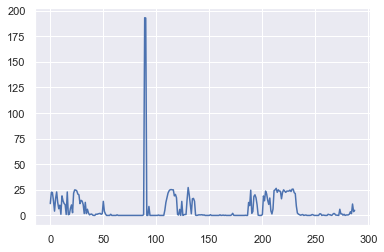

In [25]:
plt.plot(working_days.groupby(by=["5m_bottom_border_time","5m_top_border_time"]).median()["speed"].values)

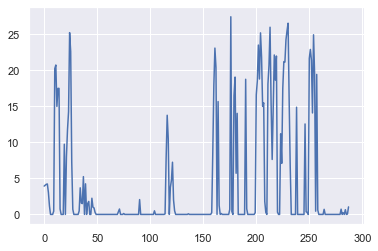

In [26]:
plt.plot(weekends.groupby(by=["5m_bottom_border_time","5m_top_border_time"]).median()["speed"].values)

In [27]:
#most probably time range should be extended (I will try 20 min)
df["20m_bottom_border_time"]=df["day_time_seconds"]//1200*20
df["20m_top_border_time"]=(df["day_time_seconds"]//1200+1)*20

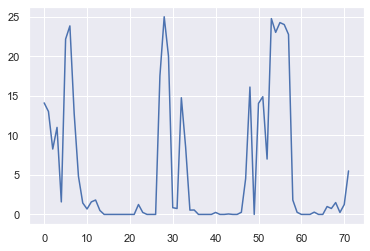

In [28]:
plt.plot(df[df["weekday"]<5].groupby(by=["20m_bottom_border_time","20m_top_border_time"]).median()["speed"].values)

(0.0, 25.0)

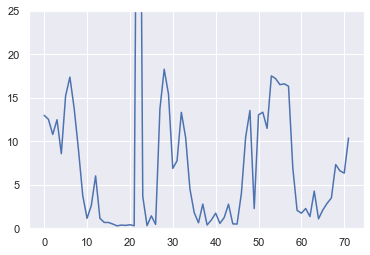

In [29]:
plt.plot(df[df["weekday"]<5].groupby(by=["20m_bottom_border_time","20m_top_border_time"]).mean()["speed"].values)
plt.ylim((0,25))

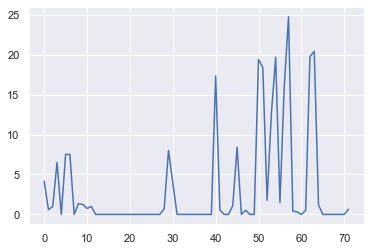

In [30]:
plt.plot(df[df["weekday"]>=5].groupby(by=["20m_bottom_border_time","20m_top_border_time"]).median()["speed"].values)

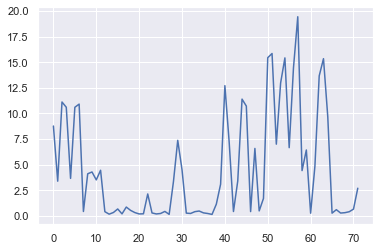

In [31]:
plt.plot(df[df["weekday"]>=5].groupby(by=["20m_bottom_border_time","20m_top_border_time"]).mean()["speed"].values)

In [32]:
#45-min range
df["45m_bottom_border_time"]=df["day_time_seconds"]//2700*45
df["45m_top_border_time"]=(df["day_time_seconds"]//2700+1)*45

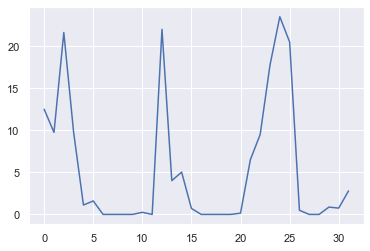

In [33]:
plt.plot(df[df["weekday"]<5].groupby(by=["45m_bottom_border_time","45m_top_border_time"]).median()["speed"].values)

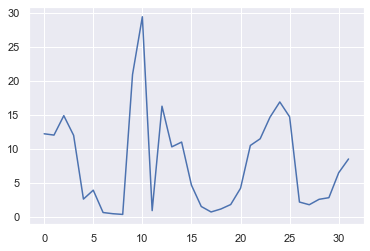

In [34]:
plt.plot(df[df["weekday"]<5].groupby(by=["45m_bottom_border_time","45m_top_border_time"]).mean()["speed"].values)

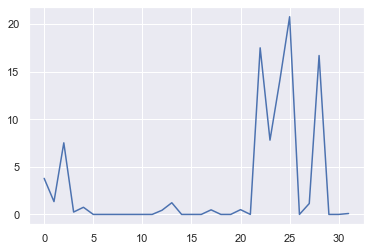

In [35]:
plt.plot(df[df["weekday"]>=5].groupby(by=["45m_bottom_border_time","45m_top_border_time"]).median()["speed"].values)

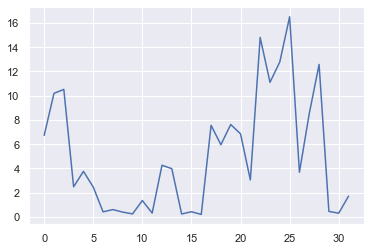

In [36]:
plt.plot(df[df["weekday"]>=5].groupby(by=["45m_bottom_border_time","45m_top_border_time"]).mean()["speed"].values)

<h2>plot with time range</h2>

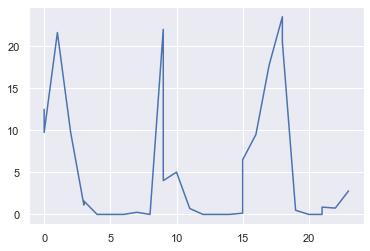

In [37]:
plt.plot(pd.DataFrame(df[df["weekday"]<5].groupby(by=["45m_bottom_border_time","45m_top_border_time"]).median()["speed"].values,index=pd.date_range("00:00", "23:59", freq="45min").hour))

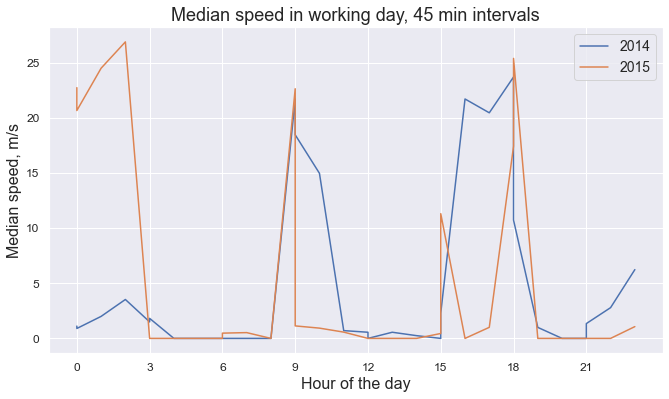

In [38]:
df_2014=df[df["time_system_ts"].dt.year==2014]
df_2015=df[df["time_system_ts"].dt.year==2015]
plt.figure(figsize=(11,6))
plt.plot(pd.DataFrame(df_2014[df_2014["weekday"]<5].groupby(by=["45m_bottom_border_time","45m_top_border_time"]).median()["speed"].values,index=pd.date_range("00:00", "23:59", freq="45min").hour),label=2014)
plt.plot(pd.DataFrame(df_2015[df_2015["weekday"]<5].groupby(by=["45m_bottom_border_time","45m_top_border_time"]).median()["speed"].values,index=pd.date_range("00:00", "23:59", freq="45min").hour),label=2015)
plt.ylabel("Median speed, m/s",fontsize=16)
plt.xlabel("Hour of the day",fontsize=16)
plt.title("Median speed in working day, 45 min intervals",fontsize=18)
plt.legend(fontsize=14)
plt.xticks(np.arange(0,24,3),fontsize=12)
plt.yticks(fontsize=12)
plt.savefig(r"C:\Users\Kasutaja\OneDrive - Tartu Ülikool\Geography communication and spatial mobility\Assignment 3\Plots\speed_working_days.svg")

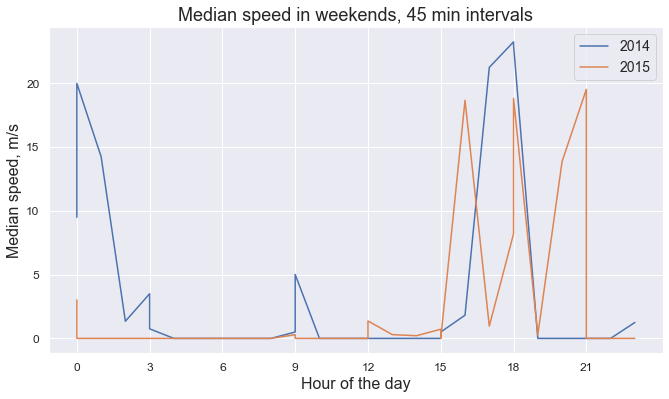

In [39]:
df_2014=df[df["time_system_ts"].dt.year==2014]
df_2015=df[df["time_system_ts"].dt.year==2015]
plt.figure(figsize=(11,6))
plt.plot(pd.DataFrame(df_2014[df_2014["weekday"]>=5].groupby(by=["45m_bottom_border_time","45m_top_border_time"]).median()["speed"].values,index=pd.date_range("00:00", "23:59", freq="45min").hour),label=2014)
plt.plot(pd.DataFrame(df_2015[df_2015["weekday"]>=5].groupby(by=["45m_bottom_border_time","45m_top_border_time"]).median()["speed"].values,index=pd.date_range("00:00", "23:59", freq="45min").hour),label=2015)
plt.ylabel("Median speed, m/s",fontsize=16)
plt.xlabel("Hour of the day",fontsize=16)
plt.title("Median speed in weekends, 45 min intervals",fontsize=18)
plt.legend(fontsize=14)
plt.xticks(np.arange(0,24,3),fontsize=12)
plt.yticks(fontsize=12)
plt.savefig(r"C:\Users\Kasutaja\OneDrive - Tartu Ülikool\Geography communication and spatial mobility\Assignment 3\Plots\speed_weekends.svg")

<h2>in general we may say that during the working days this user prefers a car or a bus (based on speed)</h2>

In [40]:
df["day_unique"]=df["time_system_ts"].dt.date.rank().apply(lambda x: str(int(x)))
df["for_count"]=1

In [41]:
#we count number of days for each time interval within the day to create a diagram for 1 day
days_5m=df.groupby(["5m_bottom_border_time","5m_top_border_time","day_unique"]).sum().index.to_frame(index=False).groupby(["5m_bottom_border_time","5m_top_border_time"]).count()
days_5m

,,day_unique
5m_bottom_border_time,5m_top_border_time,
0,5,43
5,10,48
10,15,37
15,20,39
20,25,37
...,...,...
1415,1420,40
1420,1425,41
1425,1430,33


<h1>Distance based on the initial table gives quite strange results that differ from distance received from coordinates, that's why it is better to use distance from QGIS</h1>

In [42]:
distances=pd.read_csv(r"C:\Users\Kasutaja\OneDrive - Tartu Ülikool\Geography communication and spatial mobility\Assignment 3\QGIS\distance_from_coord.csv")
distances.columns=["id_dist","dist_coord"]

In [43]:
df_merged=df.merge(distances,left_on="id",right_on="id_dist",how="left")
df_merged

,id,time_system_ts,x,y,accuracy,speed,altitude,time_diff,end_x,end_y,...,5m_top_border_time,weekday,20m_bottom_border_time,20m_top_border_time,45m_bottom_border_time,45m_top_border_time,day_unique,for_count,id_dist,dist_coord
0,83250363,2014-06-30 00:00:26,26.692247,58.352892,41.0,1.75,40.5000,12.0,26.692482,58.352700,...,5,0,0,20,0,45,2965,1,83250363.0,25.362963
1,83250364,2014-06-30 00:00:38,26.692482,58.352700,44.0,0.00,44.9000,1.0,26.692479,58.352701,...,5,0,0,20,0,45,2965,1,83250364.0,0.172188
2,83250365,2014-06-30 00:00:39,26.692479,58.352701,42.0,0.00,44.9000,1.0,26.692477,58.352701,...,5,0,0,20,0,45,2965,1,83250365.0,0.094303
3,83250366,2014-06-30 00:00:40,26.692477,58.352701,39.0,0.00,44.9000,1.0,26.692478,58.352701,...,5,0,0,20,0,45,2965,1,83250366.0,0.019616
4,83250367,2014-06-30 00:00:41,26.692478,58.352701,38.0,0.00,44.9000,1.0,26.692477,58.352701,...,5,0,0,20,0,45,2965,1,83250367.0,0.019541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243138,236300427,2015-08-31 23:20:26,26.722277,58.374617,12.0,0.00,80.7324,1.0,26.722317,58.374524,...,1405,0,1400,1420,1395,1440,242665,1,236300427.0,10.584783
243139,236300428,2015-08-31 23:20:27,26.722317,58.374524,12.0,0.00,79.6099,1.0,26.722317,58.374524,...,1405,0,1400,1420,1395,1440,242665,1,NaN,NaN
243140,236300429,2015-08-31 23:20:28,26.722317,58.374524,32.0,0.00,86.5748,1.0,26.722317,58.374524,...,1405,0,1400,1420,1395,1440,242665,1,NaN,NaN
243141,236300430,2015-08-31 23:20:29,26.722317,58.374524,16.0,0.00,88.8012,1.0,26.722317,58.374524,...,1405,0,1400,1420,1395,1440,242665,1,NaN,NaN


In [44]:
df_merged["distance"]=df_merged["dist_coord"]
df_merged

,id,time_system_ts,x,y,accuracy,speed,altitude,time_diff,end_x,end_y,...,weekday,20m_bottom_border_time,20m_top_border_time,45m_bottom_border_time,45m_top_border_time,day_unique,for_count,id_dist,dist_coord,distance
0,83250363,2014-06-30 00:00:26,26.692247,58.352892,41.0,1.75,40.5000,12.0,26.692482,58.352700,...,0,0,20,0,45,2965,1,83250363.0,25.362963,25.362963
1,83250364,2014-06-30 00:00:38,26.692482,58.352700,44.0,0.00,44.9000,1.0,26.692479,58.352701,...,0,0,20,0,45,2965,1,83250364.0,0.172188,0.172188
2,83250365,2014-06-30 00:00:39,26.692479,58.352701,42.0,0.00,44.9000,1.0,26.692477,58.352701,...,0,0,20,0,45,2965,1,83250365.0,0.094303,0.094303
3,83250366,2014-06-30 00:00:40,26.692477,58.352701,39.0,0.00,44.9000,1.0,26.692478,58.352701,...,0,0,20,0,45,2965,1,83250366.0,0.019616,0.019616
4,83250367,2014-06-30 00:00:41,26.692478,58.352701,38.0,0.00,44.9000,1.0,26.692477,58.352701,...,0,0,20,0,45,2965,1,83250367.0,0.019541,0.019541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243138,236300427,2015-08-31 23:20:26,26.722277,58.374617,12.0,0.00,80.7324,1.0,26.722317,58.374524,...,0,1400,1420,1395,1440,242665,1,236300427.0,10.584783,10.584783
243139,236300428,2015-08-31 23:20:27,26.722317,58.374524,12.0,0.00,79.6099,1.0,26.722317,58.374524,...,0,1400,1420,1395,1440,242665,1,NaN,NaN,NaN
243140,236300429,2015-08-31 23:20:28,26.722317,58.374524,32.0,0.00,86.5748,1.0,26.722317,58.374524,...,0,1400,1420,1395,1440,242665,1,NaN,NaN,NaN
243141,236300430,2015-08-31 23:20:29,26.722317,58.374524,16.0,0.00,88.8012,1.0,26.722317,58.374524,...,0,1400,1420,1395,1440,242665,1,NaN,NaN,NaN


In [45]:
df_merged=df_merged.drop(columns=["id_dist","dist_coord"])

In [46]:
df_merged["distance"]=df_merged["distance"].fillna(0)

In [47]:
days_5m_joined=pd.concat([days_5m,df_merged.groupby(["5m_bottom_border_time","5m_top_border_time"]).sum()["distance"]],axis=1)
days_5m_joined["distance_adjusted"]=days_5m_joined["distance"]/days_5m_joined["day_unique"]
days_5m_joined

,,day_unique,distance,distance_adjusted
5m_bottom_border_time,5m_top_border_time,,,
0,5,43,24625.488099,572.685770
5,10,48,29886.293372,622.631112
10,15,37,28075.725458,758.803391
15,20,39,29502.449991,756.473077
20,25,37,23901.124196,645.976330
...,...,...,...,...
1415,1420,40,12722.257926,318.056448
1420,1425,41,15961.804403,389.312303
1425,1430,33,18965.678609,574.717534


(0.0, 20000.0)

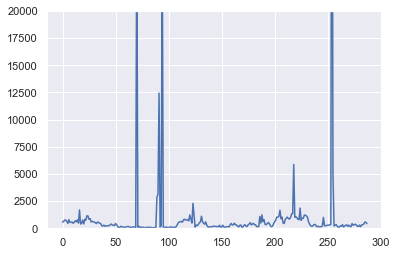

In [48]:
plt.plot(days_5m_joined["distance_adjusted"].values)
plt.ylim((0,20000))

In [49]:
#number of days for 45 min intervals
days_45m=df_merged.groupby(["45m_bottom_border_time","45m_top_border_time","day_unique"]).sum().index.to_frame(index=False).groupby(["45m_bottom_border_time","45m_top_border_time"]).count()
days_45m

,,day_unique
45m_bottom_border_time,45m_top_border_time,
0,45,77
45,90,72
90,135,72
135,180,74
180,225,74
225,270,61
270,315,52
315,360,63
360,405,55


In [50]:
days_45m_joined=pd.concat([days_45m,df_merged.groupby(["45m_bottom_border_time","45m_top_border_time"]).sum()["distance"]],axis=1)
days_45m_joined["distance_adjusted"]=days_45m_joined["distance"]/days_45m_joined["day_unique"]
days_45m_joined

,,day_unique,distance,distance_adjusted
45m_bottom_border_time,45m_top_border_time,,,
0,45,77,2.213140e+05,2874.207187
45,90,72,2.069565e+05,2874.396371
90,135,72,2.010190e+05,2791.930593
135,180,74,1.483056e+05,2004.129749
180,225,74,5.971852e+04,807.007032
225,270,61,6.027250e+04,988.073760
270,315,52,2.765757e+04,531.876404
315,360,63,9.181961e+05,14574.541986
360,405,55,2.092670e+04,380.485481


In [51]:
df_merged["year"]=df_merged["time_system_ts"].dt.year
df_merged

,id,time_system_ts,x,y,accuracy,speed,altitude,time_diff,end_x,end_y,...,5m_top_border_time,weekday,20m_bottom_border_time,20m_top_border_time,45m_bottom_border_time,45m_top_border_time,day_unique,for_count,distance,year
0,83250363,2014-06-30 00:00:26,26.692247,58.352892,41.0,1.75,40.5000,12.0,26.692482,58.352700,...,5,0,0,20,0,45,2965,1,25.362963,2014
1,83250364,2014-06-30 00:00:38,26.692482,58.352700,44.0,0.00,44.9000,1.0,26.692479,58.352701,...,5,0,0,20,0,45,2965,1,0.172188,2014
2,83250365,2014-06-30 00:00:39,26.692479,58.352701,42.0,0.00,44.9000,1.0,26.692477,58.352701,...,5,0,0,20,0,45,2965,1,0.094303,2014
3,83250366,2014-06-30 00:00:40,26.692477,58.352701,39.0,0.00,44.9000,1.0,26.692478,58.352701,...,5,0,0,20,0,45,2965,1,0.019616,2014
4,83250367,2014-06-30 00:00:41,26.692478,58.352701,38.0,0.00,44.9000,1.0,26.692477,58.352701,...,5,0,0,20,0,45,2965,1,0.019541,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243138,236300427,2015-08-31 23:20:26,26.722277,58.374617,12.0,0.00,80.7324,1.0,26.722317,58.374524,...,1405,0,1400,1420,1395,1440,242665,1,10.584783,2015
243139,236300428,2015-08-31 23:20:27,26.722317,58.374524,12.0,0.00,79.6099,1.0,26.722317,58.374524,...,1405,0,1400,1420,1395,1440,242665,1,0.000000,2015
243140,236300429,2015-08-31 23:20:28,26.722317,58.374524,32.0,0.00,86.5748,1.0,26.722317,58.374524,...,1405,0,1400,1420,1395,1440,242665,1,0.000000,2015
243141,236300430,2015-08-31 23:20:29,26.722317,58.374524,16.0,0.00,88.8012,1.0,26.722317,58.374524,...,1405,0,1400,1420,1395,1440,242665,1,0.000000,2015


In [52]:
df_merged[df_merged["time_system_ts"].dt.weekday>=5]

,id,time_system_ts,x,y,accuracy,speed,altitude,time_diff,end_x,end_y,...,5m_top_border_time,weekday,20m_bottom_border_time,20m_top_border_time,45m_bottom_border_time,45m_top_border_time,day_unique,for_count,distance,year
24702,85484429,2014-07-05 00:05:26,26.692653,58.352913,84.0,0.75,84.400,8.0,26.692627,58.352994,...,10,5,0,20,0,45,25456,1,9.083550,2014
24703,85484430,2014-07-05 00:05:34,26.692627,58.352994,49.0,1.00,89.700,1.0,26.692651,58.352970,...,10,5,0,20,0,45,25456,1,2.968720,2014
24704,85484431,2014-07-05 00:05:35,26.692651,58.352970,46.0,0.75,87.900,1.0,26.692626,58.352978,...,10,5,0,20,0,45,25456,1,1.723655,2014
24705,85484432,2014-07-05 00:05:36,26.692626,58.352978,44.0,0.75,86.600,1.0,26.692621,58.352953,...,10,5,0,20,0,45,25456,1,2.800565,2014
24706,85484433,2014-07-05 00:05:37,26.692621,58.352953,43.0,0.75,84.200,1.0,26.692589,58.352943,...,10,5,0,20,0,45,25456,1,2.168569,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242181,235922535,2015-08-30 23:11:25,26.722294,58.374468,16.0,0.00,115.759,1.0,26.722294,58.374468,...,1395,6,1380,1400,1350,1395,241982,1,0.000000,2015
242182,235922536,2015-08-30 23:11:26,26.722294,58.374468,16.0,0.00,115.835,1.0,26.722294,58.374468,...,1395,6,1380,1400,1350,1395,241982,1,0.000000,2015
242183,235922537,2015-08-30 23:11:27,26.722294,58.374468,16.0,0.00,114.158,1.0,26.722294,58.374468,...,1395,6,1380,1400,1350,1395,241982,1,0.000000,2015
242184,235922538,2015-08-30 23:11:28,26.722294,58.374468,16.0,0.00,110.462,1.0,26.722294,58.374468,...,1395,6,1380,1400,1350,1395,241982,1,0.000000,2015


In [53]:
def distance_per_day(df_merged,year,days_type):
    distance_30min_2014=df_merged[df_merged["time_system_ts"].dt.year==year].set_index("time_system_ts").resample("30Min").sum()
    distance_30min_2014["time_system_ts"]=distance_30min_2014.index
    distance_30min_2014=distance_30min_2014.reset_index(drop=True)
    distance_30min_2014["minutes"]=distance_30min_2014["time_system_ts"].dt.minute+distance_30min_2014["time_system_ts"].dt.hour*60
    if days_type=="working":
        distance_30min_2014=distance_30min_2014[distance_30min_2014["time_system_ts"].dt.weekday<5]
    else:
        distance_30min_2014=distance_30min_2014[distance_30min_2014["time_system_ts"].dt.weekday>=5]
    result=pd.DataFrame(distance_30min_2014.groupby("minutes").mean()["distance"]/1000)
    result.index=result.index/60
    return result

In [54]:
distance_per_day(df_merged,2014,"working").sum()

distance    26.160504
dtype: float64

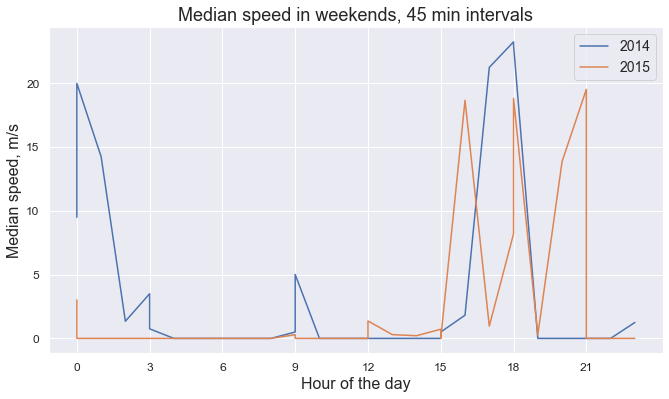

In [55]:
df_2014=df[df["time_system_ts"].dt.year==2014]
df_2015=df[df["time_system_ts"].dt.year==2015]
plt.figure(figsize=(11,6))
plt.plot(pd.DataFrame(df_2014[df_2014["weekday"]>=5].groupby(by=["45m_bottom_border_time","45m_top_border_time"]).median()["speed"].values,index=pd.date_range("00:00", "23:59", freq="45min").hour),label=2014)
plt.plot(pd.DataFrame(df_2015[df_2015["weekday"]>=5].groupby(by=["45m_bottom_border_time","45m_top_border_time"]).median()["speed"].values,index=pd.date_range("00:00", "23:59", freq="45min").hour),label=2015)
plt.ylabel("Median speed, m/s",fontsize=16)
plt.xlabel("Hour of the day",fontsize=16)
plt.title("Median speed in weekends, 45 min intervals",fontsize=18)
plt.legend(fontsize=14)
plt.xticks(np.arange(0,24,3),fontsize=12)
plt.yticks(fontsize=12)
plt.savefig(r"C:\Users\Kasutaja\OneDrive - Tartu Ülikool\Geography communication and spatial mobility\Assignment 3\Plots\speed_weekends.svg")

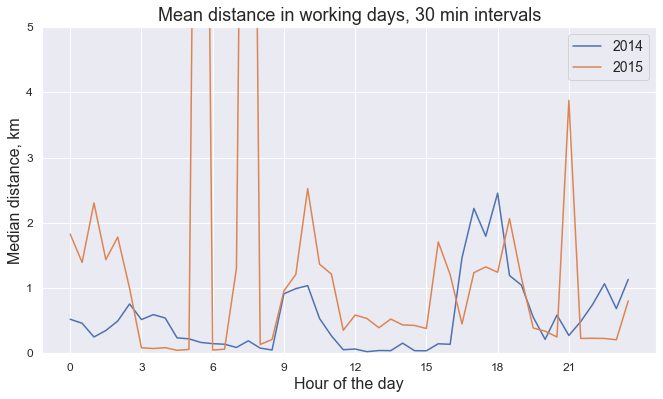

In [56]:
plt.figure(figsize=(11,6))
plt.plot(distance_per_day(df_merged,2014,"working"),label=2014)
plt.plot(distance_per_day(df_merged,2015,"working"),label=2015)
plt.ylim((0,5))
plt.ylabel("Median distance, km",fontsize=16)
plt.xlabel("Hour of the day",fontsize=16)
plt.title("Mean distance in working days, 30 min intervals",fontsize=18)
plt.legend(fontsize=14)
plt.xticks(np.arange(0,24,3),fontsize=12)
plt.yticks(fontsize=12)
plt.savefig(r"C:\Users\Kasutaja\OneDrive - Tartu Ülikool\Geography communication and spatial mobility\Assignment 3\Plots\distance_working_days.svg")

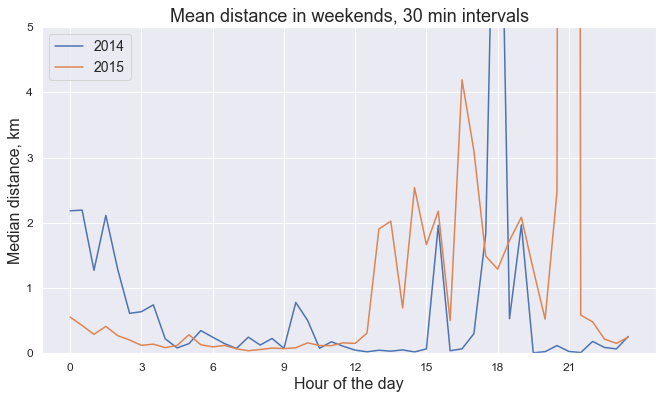

In [57]:
plt.figure(figsize=(11,6))
plt.plot(distance_per_day(df_merged,2014,""),label=2014)
plt.plot(distance_per_day(df_merged,2015,""),label=2015)
plt.ylim((0,5))
plt.ylabel("Median distance, km",fontsize=16)
plt.xlabel("Hour of the day",fontsize=16)
plt.title("Mean distance in weekends, 30 min intervals",fontsize=18)
plt.legend(fontsize=14)
plt.xticks(np.arange(0,24,3),fontsize=12)
plt.yticks(fontsize=12)
plt.savefig(r"C:\Users\Kasutaja\OneDrive - Tartu Ülikool\Geography communication and spatial mobility\Assignment 3\Plots\distance_weekends.svg")

<h2> Most probably for one day activity it's better to use speed rather than distance </h2>

<h2> Maybe to identify in which time of the day what transport type is used it's better to use table with definite speed range assigned to definite transport? For example, walking is 2-3 m/s, car - 20/30 etc.<h2>

In [58]:
#let's define daily mileage and compare 2014 and 2015
df_merged["day"]=df_merged["time_system_ts"].dt.day
df_merged["month"]=df_merged["time_system_ts"].dt.month
df_merged["year"]=df_merged["time_system_ts"].dt.year

In [59]:
df_2014=df_merged[df_merged["time_system_ts"].dt.year==2014]
df_2015=df_merged[df_merged["time_system_ts"].dt.year==2015]

In [60]:
#also we should consider that may be different amount of days

In [61]:
df_2014.groupby(["month","day"]).sum().groupby("day").mean()

,id,x,y,accuracy,speed,altitude,time_diff,end_x,end_y,prev_time_diff,...,5m_bottom_border_time,5m_top_border_time,weekday,20m_bottom_border_time,20m_top_border_time,45m_bottom_border_time,45m_top_border_time,for_count,distance,year
day,,,,,,,,,,,,,,,,,,,,,
1,3.566767e+11,112032.034969,246808.975801,106052.500000,33385.564455,357921.450000,7.894800e+04,112031.662301,246808.972211,94019.500000,...,3733145.0,3.754290e+06,4614.5,3699090.0,3.783670e+06,3647385.0,3837690.0,4229.000000,44693.459573,8.517206e+06
2,5.477156e+11,157646.073179,347595.995740,114789.500000,44507.370745,426182.550000,1.099245e+05,157646.446249,347595.999083,83031.000000,...,3614947.5,3.644730e+06,21022.5,3570170.0,3.689300e+06,3495555.0,3763597.5,5956.500000,59817.860226,1.199639e+07
3,8.053407e+10,25050.866285,54748.138017,23749.500000,3590.899240,80195.350000,6.416000e+04,25050.870656,54748.139387,87187.500000,...,729127.5,7.338175e+05,2907.0,721390.0,7.401500e+05,715207.5,757417.5,938.000000,7697.778476,1.889132e+06
4,1.630282e+11,48716.696142,106462.879263,43825.500000,5801.483959,163155.250000,8.922650e+04,48716.679391,106462.867643,81764.500000,...,1080352.5,1.089472e+06,5836.0,1067720.0,1.104200e+06,1040445.0,1122525.0,1824.000000,15987.169406,3.673536e+06
5,2.421855e+11,65203.882466,142481.579375,51850.500000,11911.987343,201472.000000,8.623750e+04,65203.896751,142481.591149,67021.500000,...,641275.0,6.534750e+05,5454.0,622690.0,6.714900e+05,596857.5,706657.5,2440.000000,20676.345456,4.914160e+06
6,6.071715e+10,16152.512174,35290.992051,12479.500000,566.106181,46482.200000,8.631050e+04,16152.504138,35290.997476,84042.500000,...,295332.5,2.983550e+05,1821.0,290890.0,3.029800e+05,282037.5,309240.0,604.500000,4641.731339,1.217463e+06
7,1.142606e+11,35077.977936,76633.905453,20064.500000,7213.186451,109069.500000,1.257625e+05,35077.983835,76633.899586,77517.000000,...,1391957.5,1.398522e+06,181.5,1382180.0,1.408440e+06,1363477.5,1422562.5,1313.000000,15873.104606,2.644382e+06
8,3.145829e+10,9500.575202,20755.886544,6483.500000,404.567577,27099.700000,4.707000e+04,9500.587002,20755.901610,117368.500000,...,429477.5,4.312550e+05,468.0,426770.0,4.338800e+05,422010.0,438007.5,355.500000,3264.930234,7.159770e+05
9,9.199757e+10,28233.673907,61700.808534,26489.500000,2398.292858,92618.200000,8.893150e+04,28233.650164,61700.782452,53216.000000,...,753800.0,7.590850e+05,2171.0,745290.0,7.664300e+05,733657.5,781222.5,1057.000000,7022.669107,2.128798e+06


In [62]:
#need to check whether average distance per day is really average

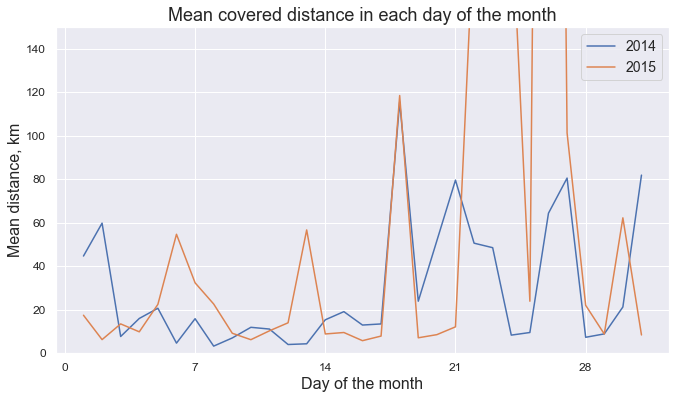

In [63]:
#mobility within a month in each day
plt.figure(figsize=(11,6))
plt.plot(df_2014.groupby(["month","day"]).sum().groupby("day").mean()["distance"]/1000,label=2014)
plt.plot(df_2015.groupby(["month","day"]).sum().groupby("day").mean()["distance"]/1000,label=2015)
plt.ylim(0,150)
plt.xticks(np.arange(0, 31, 7),fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.ylabel("Mean distance, km",fontsize=16)
plt.xlabel("Day of the month",fontsize=16)
plt.title("Mean covered distance in each day of the month",fontsize=18)
plt.savefig(r"C:\Users\Kasutaja\OneDrive - Tartu Ülikool\Geography communication and spatial mobility\Assignment 3\Plots\distance_per_day.svg")

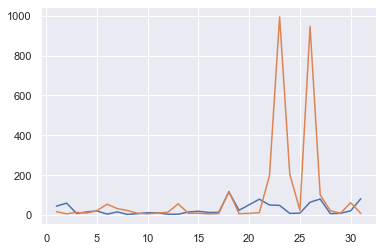

In [64]:
plt.plot(df_2014.groupby(["month","day"]).sum().groupby("day").mean()["distance"]/1000,label=2014)
plt.plot(df_2015.groupby(["month","day"]).sum().groupby("day").mean()["distance"]/1000,label=2015)

([<matplotlib.axis.XTick at 0x1da76ac7c40>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

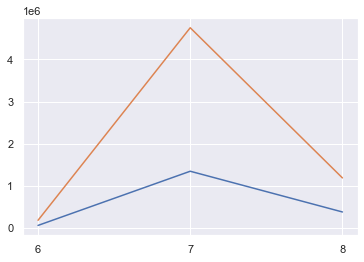

In [65]:
plt.plot(df_2014.groupby(["year","month"]).sum().groupby("month").mean()["distance"])
plt.plot(df_2015.groupby(["year","month"]).sum().groupby("month").mean()["distance"])
plt.xticks(np.arange(6, 9, 1))

In [66]:
df_2015.groupby(["year","month"]).sum().groupby("month").mean()["distance"]

month
6    1.747586e+05
7    4.755190e+06
8    1.182951e+06
Name: distance, dtype: float64

In [67]:
df_2014.groupby(["year","month"]).sum().groupby("month").mean()["distance"]

month
6    5.242243e+04
7    1.341281e+06
8    3.724000e+05
Name: distance, dtype: float64

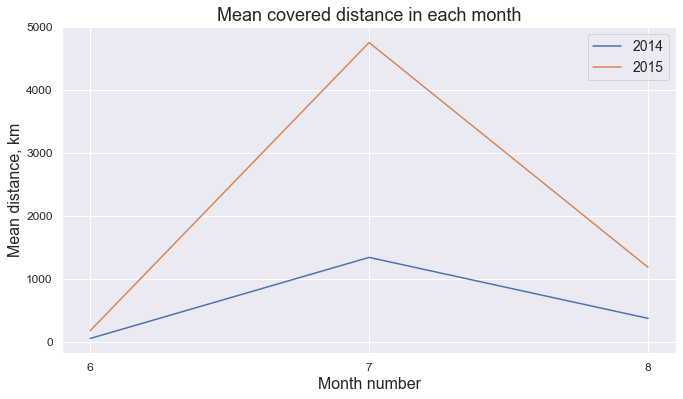

In [68]:
#mobility in each month (but we have only 3 months)
plt.figure(figsize=(11,6))
plt.plot(df_2014.groupby(["year","month"]).sum().groupby("month").mean()["distance"]/1000,label=2014)
plt.plot(df_2015.groupby(["year","month"]).sum().groupby("month").mean()["distance"]/1000,label=2015)
plt.xticks(np.arange(6, 9, 1),fontsize=12)
plt.yticks(np.arange(0,6000,1000),fontsize=12)
plt.legend(fontsize=14)
plt.ylabel("Mean distance, km",fontsize=16)
plt.xlabel("Month number",fontsize=16)
plt.title("Mean covered distance in each month",fontsize=18)
plt.savefig(r"C:\Users\Kasutaja\OneDrive - Tartu Ülikool\Geography communication and spatial mobility\Assignment 3\Plots\distance_per_month.svg")

<h1> In 2015 the mobility was definitely higher than in 2014 </h1>

In [159]:
stops

,millis_start,millis_end,duration_millis,lng,lat,radius,start_time,end_time
0,1407093656000,1407135850000,42194000.0,26.718275,58.375641,24.898721,2014-08-03 19:20:56,2014-08-04 07:04:10
1,1409454256000,1409455072000,816000.0,26.718065,58.376405,21.597098,2014-08-31 03:04:16,2014-08-31 03:17:52
2,1408645913999,1408686681000,40767001.0,26.717627,58.376167,20.642175,2014-08-21 18:31:53,2014-08-22 05:51:21
3,1409460194000,1409460780000,586000.0,26.717810,58.376394,8.485813,2014-08-31 04:43:14,2014-08-31 04:53:00
4,1408824298000,1408825478000,1180000.0,26.718320,58.375961,7.806310,2014-08-23 20:04:58,2014-08-23 20:24:38
...,...,...,...,...,...,...,...,...
1026,1440510633761,1440513873888,3240127.0,26.721784,58.376631,13.937387,2015-08-25 13:50:33,2015-08-25 14:44:33
1027,1440420925583,1440426054139,5128556.0,24.798316,59.416362,34.718811,2015-08-24 12:55:25,2015-08-24 14:20:54
1028,1438076396999,1438080880763,4483764.0,26.734501,58.462023,35.478032,2015-07-28 09:39:56,2015-07-28 10:54:40
1029,1439050887207,1439054637684,3750477.0,26.734534,58.461912,22.280304,2015-08-08 16:21:27,2015-08-08 17:23:57


In [160]:
stops["start_time"]=pd.to_datetime(stops["start_time"])
stops["end_time"]=pd.to_datetime(stops["end_time"])

In [161]:
pd.date_range(start=(stops["start_time"][2]-pd.DateOffset(minutes=15)).round("30Min"),end=(stops["end_time"][2]+pd.DateOffset(minutes=15)).round("30Min"),freq='30Min')

DatetimeIndex(['2014-08-21 18:30:00', '2014-08-21 19:00:00',
               '2014-08-21 19:30:00', '2014-08-21 20:00:00',
               '2014-08-21 20:30:00', '2014-08-21 21:00:00',
               '2014-08-21 21:30:00', '2014-08-21 22:00:00',
               '2014-08-21 22:30:00', '2014-08-21 23:00:00',
               '2014-08-21 23:30:00', '2014-08-22 00:00:00',
               '2014-08-22 00:30:00', '2014-08-22 01:00:00',
               '2014-08-22 01:30:00', '2014-08-22 02:00:00',
               '2014-08-22 02:30:00', '2014-08-22 03:00:00',
               '2014-08-22 03:30:00', '2014-08-22 04:00:00',
               '2014-08-22 04:30:00', '2014-08-22 05:00:00',
               '2014-08-22 05:30:00', '2014-08-22 06:00:00'],
              dtype='datetime64[ns]', freq='30T')

In [162]:
stops_intervals=pd.DataFrame()

In [163]:
for i in range(len(stops)):
    stops_intervals=pd.concat([stops_intervals,pd.DataFrame(pd.date_range(start=(stops["start_time"][i]-pd.DateOffset(minutes=15)).round("30Min"),end=(stops["end_time"][i]+pd.DateOffset(minutes=15)).round("30Min"),freq='30Min'))],axis=1)
    #without offset: stops_intervals=pd.concat([stops_intervals,pd.DataFrame(pd.date_range(start=(stops["start_time"][i]).round("30Min"),end=(stops["end_time"][i]).round("30Min"),freq='30Min'))],axis=1)

In [164]:
stops_intervals=stops_intervals.T
stops_intervals

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,2014-08-03 19:00:00,2014-08-03 19:30:00,2014-08-03 20:00:00,2014-08-03 20:30:00,2014-08-03 21:00:00,2014-08-03 21:30:00,2014-08-03 22:00:00,2014-08-03 22:30:00,2014-08-03 23:00:00,2014-08-03 23:30:00,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
0,2014-08-31 03:00:00,2014-08-31 03:30:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
0,2014-08-21 18:30:00,2014-08-21 19:00:00,2014-08-21 19:30:00,2014-08-21 20:00:00,2014-08-21 20:30:00,2014-08-21 21:00:00,2014-08-21 21:30:00,2014-08-21 22:00:00,2014-08-21 22:30:00,2014-08-21 23:00:00,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
0,2014-08-31 04:30:00,2014-08-31 05:00:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
0,2014-08-23 20:00:00,2014-08-23 20:30:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2015-08-25 13:30:00,2015-08-25 14:00:00,2015-08-25 14:30:00,2015-08-25 15:00:00,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
0,2015-08-24 12:30:00,2015-08-24 13:00:00,2015-08-24 13:30:00,2015-08-24 14:00:00,2015-08-24 14:30:00,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
0,2015-07-28 09:30:00,2015-07-28 10:00:00,2015-07-28 10:30:00,2015-07-28 11:00:00,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
0,2015-08-08 16:00:00,2015-08-08 16:30:00,2015-08-08 17:00:00,2015-08-08 17:30:00,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [165]:
stops_intervals.isna().sum().sum()

33999

In [166]:
stops_one_column=pd.DataFrame(stops_intervals.values.flatten())
stops_one_column.columns=["given_time"]
stops_one_column

,given_time
0,2014-08-03 19:00:00
1,2014-08-03 19:30:00
2,2014-08-03 20:00:00
3,2014-08-03 20:30:00
4,2014-08-03 21:00:00
...,...
39173,NaT
39174,NaT
39175,NaT
39176,NaT


In [167]:
stops_one_column=stops_one_column.dropna()
stops_one_column

,given_time
0,2014-08-03 19:00:00
1,2014-08-03 19:30:00
2,2014-08-03 20:00:00
3,2014-08-03 20:30:00
4,2014-08-03 21:00:00
...,...
39141,2015-08-24 09:30:00
39142,2015-08-24 10:00:00
39143,2015-08-24 10:30:00
39144,2015-08-24 11:00:00


In [169]:
stops_one_column[stops_one_column["given_time"].dt.year==year]

,given_time
0,2014-08-03 19:00:00
1,2014-08-03 19:30:00
2,2014-08-03 20:00:00
3,2014-08-03 20:30:00
4,2014-08-03 21:00:00
...,...
39141,2015-08-24 09:30:00
39142,2015-08-24 10:00:00
39143,2015-08-24 10:30:00
39144,2015-08-24 11:00:00


In [172]:
def stops(stops_one_column,year):
    stops_one_column=stops_one_column[stops_one_column["given_time"].dt.year==year]
    stops_one_column["minutes"]=stops_one_column["given_time"].dt.minute+stops_one_column["given_time"].dt.hour*60
    stops_one_column["for_count"]=1
    stops_grouped=stops_one_column.groupby("minutes").sum()
    stops_grouped.index=stops_grouped.index/60
    return stops_grouped

In [68]:
stops_one_column["minutes"]=stops_one_column["given_time"].dt.minute+stops_one_column["given_time"].dt.hour*60
stops_one_column["for_count"]=1
stops_one_column

C:\Users\Kasutaja\AppData\Local\Temp\ipykernel_2728\3794336415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stops_one_column["minutes"]=stops_one_column["given_time"].dt.minute+stops_one_column["given_time"].dt.hour*60
C:\Users\Kasutaja\AppData\Local\Temp\ipykernel_2728\3794336415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stops_one_column["for_count"]=1


,given_time,minutes,for_count
0,2014-08-03 19:00:00,1140,1
1,2014-08-03 19:30:00,1170,1
2,2014-08-03 20:00:00,1200,1
3,2014-08-03 20:30:00,1230,1
4,2014-08-03 21:00:00,1260,1
...,...,...,...
39141,2015-08-24 09:30:00,570,1
39142,2015-08-24 10:00:00,600,1
39143,2015-08-24 10:30:00,630,1
39144,2015-08-24 11:00:00,660,1


In [69]:
stops_grouped=stops_one_column.groupby("minutes").sum()
stops_grouped

,for_count
minutes,
0,87
30,82
60,81
90,76
120,79
150,79
180,83
210,80
240,84


In [70]:
stops_grouped.index=stops_grouped.index/60

C:\Users\Kasutaja\AppData\Local\Temp\ipykernel_17392\2573177712.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stops_one_column["minutes"]=stops_one_column["given_time"].dt.minute+stops_one_column["given_time"].dt.hour*60
C:\Users\Kasutaja\AppData\Local\Temp\ipykernel_17392\2573177712.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stops_one_column["for_count"]=1
C:\Users\Kasutaja\AppData\Local\Temp\ipykernel_17392\2573177712.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

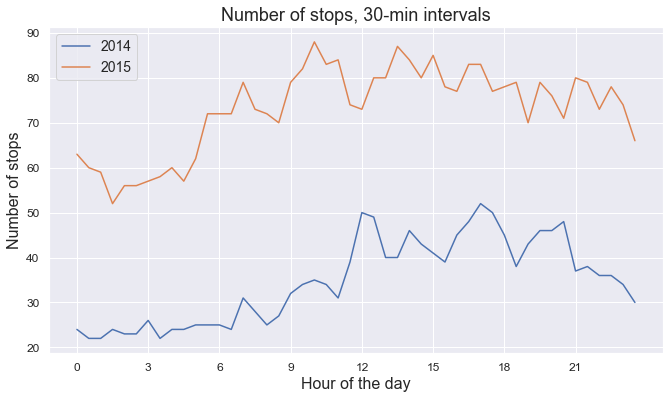

In [178]:
#mobility within a month in each day
plt.figure(figsize=(11,6))
plt.plot(stops(stops_one_column,2014),label=2014)
plt.plot(stops(stops_one_column,2015),label=2015)
plt.ylabel("Number of stops",fontsize=16)
plt.xlabel("Hour of the day",fontsize=16)
plt.title("Number of stops, 30-min intervals",fontsize=18)
plt.xticks(np.arange(0,24,3),fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.savefig(r"C:\Users\Kasutaja\OneDrive - Tartu Ülikool\Geography communication and spatial mobility\Assignment 3\Plots\stops.svg")

In [179]:
df[df["time_diff"]>=60*30]

,id,time_system_ts,x,y,accuracy,speed,altitude,time_diff,end_x,end_y,...,5m_top_border_time,weekday,20m_bottom_border_time,20m_top_border_time,45m_bottom_border_time,45m_top_border_time,30m_bottom_border_time,30m_top_border_time,day_unique,for_count
1003,83251368,2014-06-30 01:41:17,26.676431,58.359078,14.0,1.750000,97.3000,3134.0,26.676433,58.359133,...,105,0,100,120,90,135,90,120,2965,1
1826,83264412,2014-06-30 02:55:14,26.730203,58.376741,30.0,0.000000,49.8000,8464.0,26.729924,58.377475,...,180,0,160,180,135,180,150,180,2965,1
5699,83535361,2014-06-30 18:02:18,26.716143,58.373629,30.0,0.000000,76.6000,12015.0,26.716720,58.373424,...,1085,0,1080,1100,1080,1125,1080,1110,2965,1
5928,83609657,2014-06-30 22:50:21,26.715989,58.373533,27.0,0.500000,79.5000,9554.0,26.716090,58.373473,...,1375,0,1360,1380,1350,1395,1350,1380,2965,1
6014,83639783,2014-07-01 01:55:00,26.717409,58.375264,24.0,1.802780,128.1000,6678.0,26.717281,58.375418,...,120,1,100,120,90,135,90,120,10030,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243011,236218960,2015-08-31 16:52:38,26.722337,58.374621,24.0,0.000000,146.1200,3497.0,26.724008,58.374945,...,1015,0,1000,1020,990,1035,990,1020,242665,1
243091,236249934,2015-08-31 18:12:45,26.722555,58.374765,12.0,0.000000,137.5880,3112.0,26.721869,58.374456,...,1095,0,1080,1100,1080,1125,1080,1110,242665,1
243107,236257703,2015-08-31 19:21:53,26.723316,58.374732,96.0,0.338319,45.2330,2242.0,26.722568,58.374149,...,1165,0,1160,1180,1125,1170,1140,1170,242665,1
243126,236281631,2015-08-31 21:05:52,26.722246,58.374472,24.0,0.000000,73.9879,3136.0,26.722068,58.374427,...,1270,0,1260,1280,1260,1305,1260,1290,242665,1


In [180]:
df.loc[df[df["time_diff"]>=60*30].index+1]

,id,time_system_ts,x,y,accuracy,speed,altitude,time_diff,end_x,end_y,...,5m_top_border_time,weekday,20m_bottom_border_time,20m_top_border_time,45m_bottom_border_time,45m_top_border_time,30m_bottom_border_time,30m_top_border_time,day_unique,for_count
1004,83263590,2014-06-30 02:33:31,26.676433,58.359133,48.0,0.000000,74.9000,0.0,26.676470,58.359175,...,155,0,140,160,135,180,150,180,2965,1
1827,83429105,2014-06-30 05:16:18,26.729924,58.377475,23.0,1.250000,58.7000,1.0,26.729984,58.377502,...,320,0,300,320,315,360,300,330,2965,1
5700,83574973,2014-06-30 21:22:33,26.716720,58.373424,53.0,1.250000,75.1000,1.0,26.716734,58.373449,...,1285,0,1280,1300,1260,1305,1260,1290,2965,1
5929,83639698,2014-07-01 01:29:35,26.716090,58.373473,48.0,0.000000,71.7000,1.0,26.716095,58.373475,...,90,1,80,100,45,90,60,90,10030,1
6015,83659706,2014-07-01 03:46:18,26.717281,58.375418,32.0,3.783190,99.9000,0.0,26.717311,58.375291,...,230,1,220,240,225,270,210,240,10030,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243012,236249853,2015-08-31 17:50:55,26.724008,58.374945,64.0,1.452850,89.1170,35.0,26.724743,58.375252,...,1075,0,1060,1080,1035,1080,1050,1080,242665,1
243092,236257688,2015-08-31 19:04:37,26.721869,58.374456,32.0,0.063794,24.0200,1.0,26.721875,58.374458,...,1145,0,1140,1160,1125,1170,1140,1170,242665,1
243108,236272238,2015-08-31 19:59:15,26.722568,58.374149,96.0,1.275310,70.3055,1178.0,26.721913,58.374582,...,1200,0,1180,1200,1170,1215,1170,1200,242665,1
243127,236292531,2015-08-31 21:58:08,26.722068,58.374427,64.0,1.913870,59.1606,4922.0,26.721961,58.374061,...,1320,0,1300,1320,1305,1350,1290,1320,242665,1


In [181]:
df[df["time_diff"]>=60*30]["time_system_ts"]

1003     2014-06-30 01:41:17
1826     2014-06-30 02:55:14
5699     2014-06-30 18:02:18
5928     2014-06-30 22:50:21
6014     2014-07-01 01:55:00
                 ...        
243011   2015-08-31 16:52:38
243091   2015-08-31 18:12:45
243107   2015-08-31 19:21:53
243126   2015-08-31 21:05:52
243127   2015-08-31 21:58:08
Name: time_system_ts, Length: 839, dtype: datetime64[ns]

In [182]:
df.loc[df[df["time_diff"]>=60*30].index+1]["time_system_ts"]

1004     2014-06-30 02:33:31
1827     2014-06-30 05:16:18
5700     2014-06-30 21:22:33
5929     2014-07-01 01:29:35
6015     2014-07-01 03:46:18
                 ...        
243012   2015-08-31 17:50:55
243092   2015-08-31 19:04:37
243108   2015-08-31 19:59:15
243127   2015-08-31 21:58:08
243128   2015-08-31 23:20:10
Name: time_system_ts, Length: 839, dtype: datetime64[ns]

In [183]:
df_stops=pd.DataFrame()
df_stops["start_time"]=df[df["time_diff"]>=60*30]["time_system_ts"]
df_stops=df_stops.reset_index().drop(columns="index")
df_stops["end_time"]=df.iloc[df[df["time_diff"]>=60*30].index+1]["time_system_ts"].reset_index().drop(columns="index")
df_stops

,start_time,end_time
0,2014-06-30 01:41:17,2014-06-30 02:33:31
1,2014-06-30 02:55:14,2014-06-30 05:16:18
2,2014-06-30 18:02:18,2014-06-30 21:22:33
3,2014-06-30 22:50:21,2014-07-01 01:29:35
4,2014-07-01 01:55:00,2014-07-01 03:46:18
...,...,...
834,2015-08-31 16:52:38,2015-08-31 17:50:55
835,2015-08-31 18:12:45,2015-08-31 19:04:37
836,2015-08-31 19:21:53,2015-08-31 19:59:15
837,2015-08-31 21:05:52,2015-08-31 21:58:08


In [184]:
df[df["time_diff"]==26113525]

,id,time_system_ts,x,y,accuracy,speed,altitude,time_diff,end_x,end_y,...,5m_top_border_time,weekday,20m_bottom_border_time,20m_top_border_time,45m_bottom_border_time,45m_top_border_time,30m_bottom_border_time,30m_top_border_time,day_unique,for_count
121431,105433709,2014-08-31 18:14:36,26.718121,58.375443,31.0,1.82003,66.5,26113525.0,25.071252,57.383466,...,1095,6,1080,1100,1080,1125,1080,1110,120366,1


In [185]:
df.iloc[121432]

id                                  205435718
time_system_ts            2015-06-30 00:00:01
x                                   25.071252
y                                   57.383466
accuracy                                  6.0
speed                                 26.1713
altitude                              97.3539
time_diff                                 1.0
end_x                               25.071585
end_y                               57.383618
prev_time_diff                     26113525.0
day_time_seconds                            1
5m_bottom_border_time                       0
5m_top_border_time                          5
weekday                                     1
20m_bottom_border_time                      0
20m_top_border_time                        20
45m_bottom_border_time                      0
45m_top_border_time                        45
30m_bottom_border_time                      0
30m_top_border_time                        30
day_unique                        

Text(0.5, 0, 'hour of the day')

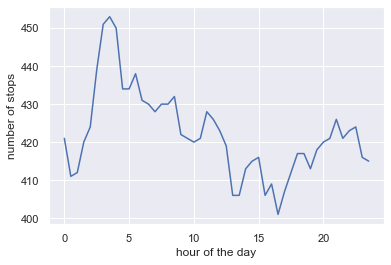

In [186]:
df_stops_intervals=pd.DataFrame()

for i in range(len(df_stops)):
    df_stops_intervals=pd.concat([df_stops_intervals,pd.DataFrame(pd.date_range(start=(df_stops["start_time"][i]-pd.DateOffset(minutes=15)).round("30Min"),end=(df_stops["end_time"][i]+pd.DateOffset(minutes=15)).round("30Min"),freq='30Min'))],axis=1)
    
df_stops_one_column=pd.DataFrame(df_stops_intervals.values.flatten())
df_stops_one_column.columns=["given_time"]
df_stops_one_column=df_stops_one_column.dropna()

df_stops_one_column["minutes"]=df_stops_one_column["given_time"].dt.minute+df_stops_one_column["given_time"].dt.hour*60
df_stops_one_column["for_count"]=1

df_stops_grouped=df_stops_one_column.groupby("minutes").sum()
df_stops_grouped.index=df_stops_grouped.index/60

plt.plot(df_stops_grouped)

plt.ylabel("number of stops")
plt.xlabel("hour of the day")

In [187]:
df_stops_grouped

,for_count
minutes,
0.0,421
0.5,411
1.0,412
1.5,420
2.0,424
2.5,439
3.0,451
3.5,453
4.0,450


In [188]:
df_stops_one_column.sort_values(by="given_time")

,given_time,minutes,for_count
0,2014-06-30 01:30:00,90,1
839,2014-06-30 02:00:00,120,1
1,2014-06-30 02:30:00,150,1
1678,2014-06-30 02:30:00,150,1
2517,2014-06-30 03:00:00,180,1
...,...,...,...
1677,2015-08-31 22:00:00,1320,1
2515,2015-08-31 22:00:00,1320,1
2516,2015-08-31 22:30:00,1350,1
3355,2015-08-31 23:00:00,1380,1


In [189]:
df_stops_intervals

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,2014-06-30 01:30:00,2014-06-30 02:30:00,2014-06-30 18:00:00,2014-06-30 22:30:00,2014-07-01 01:30:00,2014-07-01 20:00:00,2014-07-02 01:30:00,2014-07-02 03:00:00,2014-07-02 03:30:00,2014-07-02 09:30:00,...,2015-08-31 02:30:00,2015-08-31 03:00:00,2015-08-31 04:00:00,2015-08-31 05:30:00,2015-08-31 06:30:00,2015-08-31 16:30:00,2015-08-31 18:00:00,2015-08-31 19:00:00,2015-08-31 21:00:00,2015-08-31 21:30:00
1,2014-06-30 02:00:00,2014-06-30 03:00:00,2014-06-30 18:30:00,2014-06-30 23:00:00,2014-07-01 02:00:00,2014-07-01 20:30:00,2014-07-02 02:00:00,2014-07-02 03:30:00,2014-07-02 04:00:00,2014-07-02 10:00:00,...,2015-08-31 03:00:00,2015-08-31 03:30:00,2015-08-31 04:30:00,2015-08-31 06:00:00,2015-08-31 07:00:00,2015-08-31 17:00:00,2015-08-31 18:30:00,2015-08-31 19:30:00,2015-08-31 21:30:00,2015-08-31 22:00:00
2,2014-06-30 02:30:00,2014-06-30 03:30:00,2014-06-30 19:00:00,2014-06-30 23:30:00,2014-07-01 02:30:00,2014-07-01 21:00:00,2014-07-02 02:30:00,2014-07-02 04:00:00,2014-07-02 04:30:00,2014-07-02 10:30:00,...,2015-08-31 03:30:00,2015-08-31 04:00:00,2015-08-31 05:00:00,2015-08-31 06:30:00,2015-08-31 07:30:00,2015-08-31 17:30:00,2015-08-31 19:00:00,2015-08-31 20:00:00,2015-08-31 22:00:00,2015-08-31 22:30:00
3,2014-06-30 03:00:00,2014-06-30 04:00:00,2014-06-30 19:30:00,2014-07-01 00:00:00,2014-07-01 03:00:00,2014-07-01 21:30:00,2014-07-02 03:00:00,NaT,2014-07-02 05:00:00,NaT,...,NaT,2015-08-31 04:30:00,2015-08-31 05:30:00,2015-08-31 07:00:00,2015-08-31 08:00:00,2015-08-31 18:00:00,2015-08-31 19:30:00,NaT,NaT,2015-08-31 23:00:00
4,NaT,2014-06-30 04:30:00,2014-06-30 20:00:00,2014-07-01 00:30:00,2014-07-01 03:30:00,NaT,NaT,NaT,2014-07-02 05:30:00,NaT,...,NaT,NaT,NaT,NaT,2015-08-31 08:30:00,NaT,NaT,NaT,NaT,2015-08-31 23:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14505,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
14506,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
14507,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
14508,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [190]:
df["time_diff"].max()

26113525.0

In [191]:
#number of weekdays in df
df_days=pd.DataFrame(df_stops.values.reshape(1,839*2)).T
df_days.columns=["given_time"]
df_days["given_time"]=pd.to_datetime(df_days["given_time"])
df_days["day"]=df_days["given_time"].dt.weekday
df_days["for_count"]=1
df_days.groupby("day").sum()

,for_count
day,
0,257
1,214
2,250
3,244
4,250
5,214
6,249


In [192]:
#number of weekdays in stops
stops_days=pd.concat([stops["start_time"],stops["end_time"]]).reset_index().drop(columns="index")
stops_days.columns=["given_time"]
stops_days["given_time"]=pd.to_datetime(stops_days["given_time"])
stops_days["day"]=stops_days["given_time"].dt.weekday
stops_days["for_count"]=1
stops_days.groupby("day").sum()

TypeError: 'function' object is not subscriptable

In [193]:
df[df["time_diff"]>=60*30]

,id,time_system_ts,x,y,accuracy,speed,altitude,time_diff,end_x,end_y,...,5m_top_border_time,weekday,20m_bottom_border_time,20m_top_border_time,45m_bottom_border_time,45m_top_border_time,30m_bottom_border_time,30m_top_border_time,day_unique,for_count
1003,83251368,2014-06-30 01:41:17,26.676431,58.359078,14.0,1.750000,97.3000,3134.0,26.676433,58.359133,...,105,0,100,120,90,135,90,120,2965,1
1826,83264412,2014-06-30 02:55:14,26.730203,58.376741,30.0,0.000000,49.8000,8464.0,26.729924,58.377475,...,180,0,160,180,135,180,150,180,2965,1
5699,83535361,2014-06-30 18:02:18,26.716143,58.373629,30.0,0.000000,76.6000,12015.0,26.716720,58.373424,...,1085,0,1080,1100,1080,1125,1080,1110,2965,1
5928,83609657,2014-06-30 22:50:21,26.715989,58.373533,27.0,0.500000,79.5000,9554.0,26.716090,58.373473,...,1375,0,1360,1380,1350,1395,1350,1380,2965,1
6014,83639783,2014-07-01 01:55:00,26.717409,58.375264,24.0,1.802780,128.1000,6678.0,26.717281,58.375418,...,120,1,100,120,90,135,90,120,10030,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243011,236218960,2015-08-31 16:52:38,26.722337,58.374621,24.0,0.000000,146.1200,3497.0,26.724008,58.374945,...,1015,0,1000,1020,990,1035,990,1020,242665,1
243091,236249934,2015-08-31 18:12:45,26.722555,58.374765,12.0,0.000000,137.5880,3112.0,26.721869,58.374456,...,1095,0,1080,1100,1080,1125,1080,1110,242665,1
243107,236257703,2015-08-31 19:21:53,26.723316,58.374732,96.0,0.338319,45.2330,2242.0,26.722568,58.374149,...,1165,0,1160,1180,1125,1170,1140,1170,242665,1
243126,236281631,2015-08-31 21:05:52,26.722246,58.374472,24.0,0.000000,73.9879,3136.0,26.722068,58.374427,...,1270,0,1260,1280,1260,1305,1260,1290,242665,1


In [194]:
df.iloc[df[df["time_diff"]>=60*30].index+1]

,id,time_system_ts,x,y,accuracy,speed,altitude,time_diff,end_x,end_y,...,5m_top_border_time,weekday,20m_bottom_border_time,20m_top_border_time,45m_bottom_border_time,45m_top_border_time,30m_bottom_border_time,30m_top_border_time,day_unique,for_count
1004,83263590,2014-06-30 02:33:31,26.676433,58.359133,48.0,0.000000,74.9000,0.0,26.676470,58.359175,...,155,0,140,160,135,180,150,180,2965,1
1827,83429105,2014-06-30 05:16:18,26.729924,58.377475,23.0,1.250000,58.7000,1.0,26.729984,58.377502,...,320,0,300,320,315,360,300,330,2965,1
5700,83574973,2014-06-30 21:22:33,26.716720,58.373424,53.0,1.250000,75.1000,1.0,26.716734,58.373449,...,1285,0,1280,1300,1260,1305,1260,1290,2965,1
5929,83639698,2014-07-01 01:29:35,26.716090,58.373473,48.0,0.000000,71.7000,1.0,26.716095,58.373475,...,90,1,80,100,45,90,60,90,10030,1
6015,83659706,2014-07-01 03:46:18,26.717281,58.375418,32.0,3.783190,99.9000,0.0,26.717311,58.375291,...,230,1,220,240,225,270,210,240,10030,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243012,236249853,2015-08-31 17:50:55,26.724008,58.374945,64.0,1.452850,89.1170,35.0,26.724743,58.375252,...,1075,0,1060,1080,1035,1080,1050,1080,242665,1
243092,236257688,2015-08-31 19:04:37,26.721869,58.374456,32.0,0.063794,24.0200,1.0,26.721875,58.374458,...,1145,0,1140,1160,1125,1170,1140,1170,242665,1
243108,236272238,2015-08-31 19:59:15,26.722568,58.374149,96.0,1.275310,70.3055,1178.0,26.721913,58.374582,...,1200,0,1180,1200,1170,1215,1170,1200,242665,1
243127,236292531,2015-08-31 21:58:08,26.722068,58.374427,64.0,1.913870,59.1606,4922.0,26.721961,58.374061,...,1320,0,1300,1320,1305,1350,1290,1320,242665,1


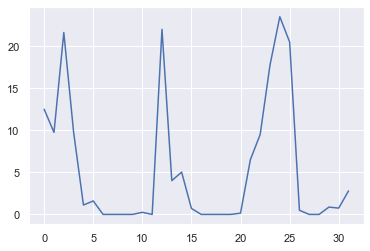

In [195]:
plt.plot(df[df["weekday"]<5].groupby(by=["45m_bottom_border_time","45m_top_border_time"]).median()["speed"].values)

In [196]:
df[df["weekday"]<5].groupby(by=["45m_bottom_border_time","45m_top_border_time"]).median()["speed"].values

array([12.5      ,  9.75     , 21.6249   ,  9.76281  ,  1.11803  ,
        1.60078  ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.25     ,  0.       , 22.       ,  4.018595 ,  5.02494  ,
        0.707107 ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.1515375,  6.4985   ,  9.5      , 17.75     , 23.5      ,
       20.5      ,  0.491184 ,  0.       ,  0.       ,  0.8693495,
        0.7511245,  2.79508  ])

In [197]:
len(pd.date_range("00:00", "23:59", freq="45min"))

32

Text(0.5, 1.0, 'median speed in working day, 45 min intervals')

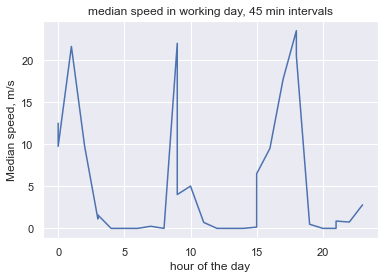

In [198]:
plt.plot(pd.DataFrame(df[df["weekday"]<5].groupby(by=["45m_bottom_border_time","45m_top_border_time"]).median()["speed"].values,index=pd.date_range("00:00", "23:59", freq="45min").hour))
plt.ylabel("Median speed, m/s")
plt.xlabel("hour of the day")
plt.title("median speed in working day, 45 min intervals")

Text(0.5, 1.0, 'median speed in weekend, 45 min intervals')

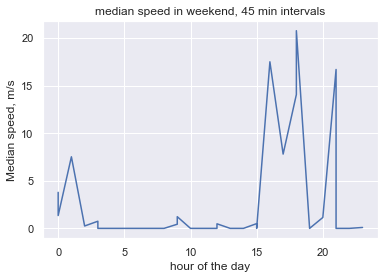

In [199]:
plt.plot(pd.DataFrame(df[df["weekday"]>=5].groupby(by=["45m_bottom_border_time","45m_top_border_time"]).median()["speed"].values,index=pd.date_range("00:00", "23:59", freq="45min").hour))
plt.ylabel("Median speed, m/s")
plt.xlabel("hour of the day")
plt.title("median speed in weekend, 45 min intervals")

In [200]:
len(np.unique(df.time_system_ts.dt.date))

124

In [201]:
def stops_number(df):
    df_stops=pd.DataFrame()
    df_stops["start_time"]=df[df["time_diff"]>=60*30]["time_system_ts"]
    df_stops=df_stops.reset_index().drop(columns="index")
    df_stops["end_time"]=df.loc[df[df["time_diff"]>=60*30].index+1]["time_system_ts"].reset_index().drop(columns="index")
    df_stops
    
    df_stops_intervals=pd.DataFrame()

    for i in range(len(df_stops)):
        df_stops_intervals=pd.concat([df_stops_intervals,pd.DataFrame(pd.date_range(start=(df_stops["start_time"][i]-pd.DateOffset(minutes=15)).round("30Min"),end=(df_stops["end_time"][i]+pd.DateOffset(minutes=15)).round("30Min"),freq='30Min'))],axis=1)

    df_stops_one_column=pd.DataFrame(df_stops_intervals.values.flatten())
    df_stops_one_column.columns=["given_time"]
    df_stops_one_column=df_stops_one_column.dropna()

    df_stops_one_column["minutes"]=df_stops_one_column["given_time"].dt.minute+df_stops_one_column["given_time"].dt.hour*60
    df_stops_one_column["for_count"]=1

    df_stops_grouped=df_stops_one_column.groupby("minutes").sum()
    df_stops_grouped.index=df_stops_grouped.index/60

    plt.plot(df_stops_grouped)

    plt.ylabel("number of stops")
    plt.xlabel("hour of the day")

In [202]:
stops_number(df[df["time_system_ts"].dt.year==2014])

KeyError: '[121432] not in index'

In [ ]:
stops_number(df[df["time_system_ts"].dt.year==2015])

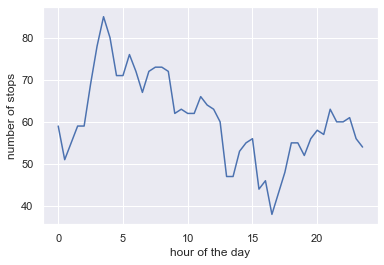

In [203]:
stops_number(df[df["time_system_ts"].dt.year==2015])

In [204]:
df[df["time_system_ts"].dt.year==2015]

,id,time_system_ts,x,y,accuracy,speed,altitude,time_diff,end_x,end_y,...,5m_top_border_time,weekday,20m_bottom_border_time,20m_top_border_time,45m_bottom_border_time,45m_top_border_time,30m_bottom_border_time,30m_top_border_time,day_unique,for_count
121432,205435718,2015-06-30 00:00:01,25.071252,57.383466,6.0,26.1713,97.3539,1.0,25.071585,57.383618,...,5,1,0,20,0,45,0,30,124440,1
121433,205435719,2015-06-30 00:00:02,25.071585,57.383618,4.0,25.9921,97.9077,1.0,25.071903,57.383771,...,5,1,0,20,0,45,0,30,124440,1
121434,205435720,2015-06-30 00:00:03,25.071903,57.383771,4.0,25.7549,98.5291,1.0,25.072217,57.383922,...,5,1,0,20,0,45,0,30,124440,1
121435,205435721,2015-06-30 00:00:04,25.072217,57.383922,4.0,25.2524,98.9424,1.0,25.072535,57.384070,...,5,1,0,20,0,45,0,30,124440,1
121436,205435722,2015-06-30 00:00:05,25.072535,57.384070,4.0,25.1093,99.2265,1.0,25.072855,57.384218,...,5,1,0,20,0,45,0,30,124440,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243138,236300427,2015-08-31 23:20:26,26.722277,58.374617,12.0,0.0000,80.7324,1.0,26.722317,58.374524,...,1405,0,1400,1420,1395,1440,1380,1410,242665,1
243139,236300428,2015-08-31 23:20:27,26.722317,58.374524,12.0,0.0000,79.6099,1.0,26.722317,58.374524,...,1405,0,1400,1420,1395,1440,1380,1410,242665,1
243140,236300429,2015-08-31 23:20:28,26.722317,58.374524,32.0,0.0000,86.5748,1.0,26.722317,58.374524,...,1405,0,1400,1420,1395,1440,1380,1410,242665,1
243141,236300430,2015-08-31 23:20:29,26.722317,58.374524,16.0,0.0000,88.8012,1.0,26.722317,58.374524,...,1405,0,1400,1420,1395,1440,1380,1410,242665,1


In [205]:
df_stops=pd.DataFrame()
df_stops["start_time"]=df[df["time_system_ts"].dt.year==2015][df[df["time_system_ts"].dt.year==2015]["time_diff"]>=60*30]["time_system_ts"]
df_stops=df_stops.reset_index().drop(columns="index")
df_stops["end_time"]=df.iloc[df[df["time_diff"]>=60*30].index+1]["time_system_ts"].reset_index().drop(columns="index")
df_stops

,start_time,end_time
0,2015-06-30 03:16:31,2014-06-30 02:33:31
1,2015-06-30 03:58:56,2014-06-30 05:16:18
2,2015-06-30 05:15:15,2014-06-30 21:22:33
3,2015-06-30 07:42:42,2014-07-01 01:29:35
4,2015-06-30 10:00:45,2014-07-01 03:46:18
...,...,...
648,2015-08-31 16:52:38,2015-08-13 06:39:16
649,2015-08-31 18:12:45,2015-08-13 07:46:08
650,2015-08-31 19:21:53,2015-08-13 10:20:01
651,2015-08-31 21:05:52,2015-08-13 12:01:16


In [206]:
df_stops

,start_time,end_time
0,2015-06-30 03:16:31,2014-06-30 02:33:31
1,2015-06-30 03:58:56,2014-06-30 05:16:18
2,2015-06-30 05:15:15,2014-06-30 21:22:33
3,2015-06-30 07:42:42,2014-07-01 01:29:35
4,2015-06-30 10:00:45,2014-07-01 03:46:18
...,...,...
648,2015-08-31 16:52:38,2015-08-13 06:39:16
649,2015-08-31 18:12:45,2015-08-13 07:46:08
650,2015-08-31 19:21:53,2015-08-13 10:20:01
651,2015-08-31 21:05:52,2015-08-13 12:01:16


In [207]:
df_2015=df[df["time_system_ts"].dt.year==2015]

In [208]:
df_2015[df_2015["time_diff"]>=60*30].index+1

Int64Index([126659, 126674, 126675, 126802, 126881, 126914, 126955, 127102,
            127148, 127434,
            ...
            242208, 242230, 242243, 242288, 242298, 243012, 243092, 243108,
            243127, 243128],
           dtype='int64', length=653)

In [209]:
df_2015

,id,time_system_ts,x,y,accuracy,speed,altitude,time_diff,end_x,end_y,...,5m_top_border_time,weekday,20m_bottom_border_time,20m_top_border_time,45m_bottom_border_time,45m_top_border_time,30m_bottom_border_time,30m_top_border_time,day_unique,for_count
121432,205435718,2015-06-30 00:00:01,25.071252,57.383466,6.0,26.1713,97.3539,1.0,25.071585,57.383618,...,5,1,0,20,0,45,0,30,124440,1
121433,205435719,2015-06-30 00:00:02,25.071585,57.383618,4.0,25.9921,97.9077,1.0,25.071903,57.383771,...,5,1,0,20,0,45,0,30,124440,1
121434,205435720,2015-06-30 00:00:03,25.071903,57.383771,4.0,25.7549,98.5291,1.0,25.072217,57.383922,...,5,1,0,20,0,45,0,30,124440,1
121435,205435721,2015-06-30 00:00:04,25.072217,57.383922,4.0,25.2524,98.9424,1.0,25.072535,57.384070,...,5,1,0,20,0,45,0,30,124440,1
121436,205435722,2015-06-30 00:00:05,25.072535,57.384070,4.0,25.1093,99.2265,1.0,25.072855,57.384218,...,5,1,0,20,0,45,0,30,124440,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243138,236300427,2015-08-31 23:20:26,26.722277,58.374617,12.0,0.0000,80.7324,1.0,26.722317,58.374524,...,1405,0,1400,1420,1395,1440,1380,1410,242665,1
243139,236300428,2015-08-31 23:20:27,26.722317,58.374524,12.0,0.0000,79.6099,1.0,26.722317,58.374524,...,1405,0,1400,1420,1395,1440,1380,1410,242665,1
243140,236300429,2015-08-31 23:20:28,26.722317,58.374524,32.0,0.0000,86.5748,1.0,26.722317,58.374524,...,1405,0,1400,1420,1395,1440,1380,1410,242665,1
243141,236300430,2015-08-31 23:20:29,26.722317,58.374524,16.0,0.0000,88.8012,1.0,26.722317,58.374524,...,1405,0,1400,1420,1395,1440,1380,1410,242665,1


In [210]:
df_2015.loc[df_2015[df_2015["time_diff"]>=60*30].index+1]

,id,time_system_ts,x,y,accuracy,speed,altitude,time_diff,end_x,end_y,...,5m_top_border_time,weekday,20m_bottom_border_time,20m_top_border_time,45m_bottom_border_time,45m_top_border_time,30m_bottom_border_time,30m_top_border_time,day_unique,for_count
126659,205444851,2015-06-30 03:58:33,26.721846,58.373777,96.0,1.361740,-144.6140,1.0,26.721917,58.374013,...,240,1,220,240,225,270,210,240,124440,1
126674,205445115,2015-06-30 05:15:15,26.722095,58.374596,64.0,1.850480,98.1774,6379.0,26.722544,58.374459,...,320,1,300,320,315,360,300,330,124440,1
126675,205445146,2015-06-30 07:01:34,26.722544,58.374459,48.0,2.035040,153.4900,7.0,26.722388,58.374502,...,425,1,420,440,405,450,420,450,124440,1
126802,205445300,2015-06-30 08:28:15,26.722024,58.374874,64.0,1.134080,120.8490,1.0,26.721970,58.374588,...,510,1,500,520,495,540,480,510,124440,1
126881,205449093,2015-06-30 10:31:26,26.722602,58.374017,64.0,1.666660,-117.7350,1.0,26.722670,58.374141,...,635,1,620,640,630,675,630,660,124440,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243012,236249853,2015-08-31 17:50:55,26.724008,58.374945,64.0,1.452850,89.1170,35.0,26.724743,58.375252,...,1075,0,1060,1080,1035,1080,1050,1080,242665,1
243092,236257688,2015-08-31 19:04:37,26.721869,58.374456,32.0,0.063794,24.0200,1.0,26.721875,58.374458,...,1145,0,1140,1160,1125,1170,1140,1170,242665,1
243108,236272238,2015-08-31 19:59:15,26.722568,58.374149,96.0,1.275310,70.3055,1178.0,26.721913,58.374582,...,1200,0,1180,1200,1170,1215,1170,1200,242665,1
243127,236292531,2015-08-31 21:58:08,26.722068,58.374427,64.0,1.913870,59.1606,4922.0,26.721961,58.374061,...,1320,0,1300,1320,1305,1350,1290,1320,242665,1


<h1>Let's count in which time intervals of the day user uses car, bus, bike or goes by foot</h1>

In [211]:
def transport_columns(df):
    df["pedestrian"]=0
    df["pedestrian"].loc[df[(df["speed"]>=0.67) & (df["speed"]<=2.2)].index]=1
    df["bicycle"]=0
    df["bicycle"].loc[df[(df["speed"]>=2.5) & (df["speed"]<5.5)].index]=1
    df["bus"]=0
    df["bus"].loc[df[(df["speed"]>=5.5) & (df["speed"]<=11.1)].index]=1
    df["car"]=0
    df["car"].loc[df[(df["speed"]>=8.3) & (df["speed"]<=33.3)].index]=1
    df["plane"]=0
    df["plane"].loc[df[(df["speed"]>=83.3) & (df["speed"]<=300)].index]=1
    df["without_movement"]=0
    df["without_movement"].loc[df[(df["speed"]>=0) & (df["speed"]<=0.27)].index]=1
    return df

In [212]:
def transport_mode(df1,transport_type,year):
    df_year=df1[df1["time_system_ts"].dt.year==year]
    df_transport=df_year[df_year[transport_type]==transport_type]
    transport_time=pd.DataFrame()
    transport_time["start_time"]=df_transport["time_system_ts"]
    transport_time=transport_time.reset_index().drop(columns=["index"])
    transport_time["end_time"]=df1.loc[df_transport.index+1]["time_system_ts"].reset_index().drop(columns=["index"])
    transport_time

    transport_intervals=transport_time.apply(lambda row: pd.date_range(start=(row["start_time"]-pd.DateOffset(minutes=15)).round("30Min"),
                                               end=(row["end_time"]+pd.DateOffset(minutes=15)).round("30Min"),freq="30Min"),axis=1)

    transport_time_one_column=pd.DataFrame(pd.DataFrame(transport_intervals.to_list()).values.flatten())
    transport_time_one_column.columns=["given_time"]
    transport_time_one_column=transport_time_one_column.dropna()

    transport_time_one_column["minutes"]=transport_time_one_column["given_time"].dt.minute+transport_time_one_column["given_time"].dt.hour*60
    transport_time_one_column["for_count"]=1

    df_transport_grouped=transport_time_one_column.groupby("minutes").sum()
    df_transport_grouped.index=df_transport_grouped.index/60

    plt.plot(df_transport_grouped, label=str(year))

    plt.ylabel("How many times this transport was used")
    plt.xlabel("Hour of the day")
    plt.title(transport_type)
    plt.legend()

In [213]:
transport_mode(df,"bicycle",2014)
transport_mode(df,"bicycle",2015)

KeyError: 'bicycle'

<h2> Maybe it would be better to use aggregated data, because in each second speed may be different. For example, when you are driving car and stay on the same place speed = 0</h2>

In [214]:
df_1min_groped=df.set_index("time_system_ts").resample("1Min").mean()
df_1min_groped=df_1min_groped[df_1min_groped["speed"].notna()]
df_1min_groped=transport_columns(df_1min_groped)
df_1min_groped["time_system_ts"]=df_1min_groped.index
df_1min_speed=pd.DataFrame(df_1min_groped.values).reset_index().drop(columns=["index"])
df_1min_speed.columns=df_1min_groped.columns
df_1min_speed

C:\Users\Kasutaja\AppData\Local\Temp\ipykernel_17392\3940609685.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["pedestrian"].loc[df[(df["speed"]>=0.67) & (df["speed"]<=2.2)].index]=1
C:\Users\Kasutaja\AppData\Local\Temp\ipykernel_17392\3940609685.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bicycle"].loc[df[(df["speed"]>=2.5) & (df["speed"]<5.5)].index]=1
C:\Users\Kasutaja\AppData\Local\Temp\ipykernel_17392\3940609685.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

,id,x,y,accuracy,speed,altitude,time_diff,end_x,end_y,prev_time_diff,...,30m_bottom_border_time,30m_top_border_time,for_count,pedestrian,bicycle,bus,car,plane,without_movement,time_system_ts
0,83250370.5,26.692537,58.352711,36.5,0.109375,48.3625,11.375,26.692562,58.352698,1.733333,...,0.0,30.0,1.0,0,0,0,0,0,1,2014-06-30 00:00:00
1,83250386.0,26.692632,58.352677,41.933333,0.0,48.713333,2.933333,26.692638,58.352677,11.466667,...,0.0,30.0,1.0,0,0,0,0,0,1,2014-06-30 00:03:00
2,83250395.0,26.692732,58.352678,55.0,0.0,57.5,21.666667,26.692725,58.352675,25.0,...,0.0,30.0,1.0,0,0,0,0,0,1,2014-06-30 00:04:00
3,83250398.5,26.692716,58.352679,50.5,0.0,60.325,15.25,26.692724,58.352695,14.75,...,0.0,30.0,1.0,0,0,0,0,0,1,2014-06-30 00:05:00
4,83250402.0,26.692747,58.352732,52.666667,0.0,63.7,70.0,26.692861,58.352764,15.0,...,0.0,30.0,1.0,0,0,0,0,0,1,2014-06-30 00:06:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24576,236272240.0,26.721913,58.374582,64.0,0.240938,105.601,1565.0,26.722597,58.374052,1178.0,...,1200.0,1230.0,1.0,0,0,0,0,0,1,2015-08-31 20:18:00
24577,236272242.0,26.722597,58.374052,96.0,0.956883,-8.8938,1239.0,26.722246,58.374472,1565.0,...,1230.0,1260.0,1.0,1,0,0,0,0,0,2015-08-31 20:44:00
24578,236281623.5,26.722246,58.374472,21.0,0.0,89.360438,196.9375,26.722235,58.37447,78.375,...,1260.0,1290.0,1.0,0,0,0,0,0,1,2015-08-31 21:05:00
24579,236292531.0,26.722068,58.374427,64.0,1.91387,59.1606,4922.0,26.721961,58.374061,3136.0,...,1290.0,1320.0,1.0,1,0,0,0,0,0,2015-08-31 21:58:00


In [215]:
df_1min_speed

,id,x,y,accuracy,speed,altitude,time_diff,end_x,end_y,prev_time_diff,...,30m_bottom_border_time,30m_top_border_time,for_count,pedestrian,bicycle,bus,car,plane,without_movement,time_system_ts
0,83250370.5,26.692537,58.352711,36.5,0.109375,48.3625,11.375,26.692562,58.352698,1.733333,...,0.0,30.0,1.0,0,0,0,0,0,1,2014-06-30 00:00:00
1,83250386.0,26.692632,58.352677,41.933333,0.0,48.713333,2.933333,26.692638,58.352677,11.466667,...,0.0,30.0,1.0,0,0,0,0,0,1,2014-06-30 00:03:00
2,83250395.0,26.692732,58.352678,55.0,0.0,57.5,21.666667,26.692725,58.352675,25.0,...,0.0,30.0,1.0,0,0,0,0,0,1,2014-06-30 00:04:00
3,83250398.5,26.692716,58.352679,50.5,0.0,60.325,15.25,26.692724,58.352695,14.75,...,0.0,30.0,1.0,0,0,0,0,0,1,2014-06-30 00:05:00
4,83250402.0,26.692747,58.352732,52.666667,0.0,63.7,70.0,26.692861,58.352764,15.0,...,0.0,30.0,1.0,0,0,0,0,0,1,2014-06-30 00:06:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24576,236272240.0,26.721913,58.374582,64.0,0.240938,105.601,1565.0,26.722597,58.374052,1178.0,...,1200.0,1230.0,1.0,0,0,0,0,0,1,2015-08-31 20:18:00
24577,236272242.0,26.722597,58.374052,96.0,0.956883,-8.8938,1239.0,26.722246,58.374472,1565.0,...,1230.0,1260.0,1.0,1,0,0,0,0,0,2015-08-31 20:44:00
24578,236281623.5,26.722246,58.374472,21.0,0.0,89.360438,196.9375,26.722235,58.37447,78.375,...,1260.0,1290.0,1.0,0,0,0,0,0,1,2015-08-31 21:05:00
24579,236292531.0,26.722068,58.374427,64.0,1.91387,59.1606,4922.0,26.721961,58.374061,3136.0,...,1290.0,1320.0,1.0,1,0,0,0,0,0,2015-08-31 21:58:00


In [216]:
df_1min_groped

,id,x,y,accuracy,speed,altitude,time_diff,end_x,end_y,prev_time_diff,...,30m_bottom_border_time,30m_top_border_time,for_count,pedestrian,bicycle,bus,car,plane,without_movement,time_system_ts
time_system_ts,,,,,,,,,,,,,,,,,,,,,
2014-06-30 00:00:00,8.325037e+07,26.692537,58.352711,36.500000,0.109375,48.362500,11.375000,26.692562,58.352698,1.733333,...,0.0,30.0,1.0,0,0,0,0,0,1,2014-06-30 00:00:00
2014-06-30 00:03:00,8.325039e+07,26.692632,58.352677,41.933333,0.000000,48.713333,2.933333,26.692638,58.352677,11.466667,...,0.0,30.0,1.0,0,0,0,0,0,1,2014-06-30 00:03:00
2014-06-30 00:04:00,8.325040e+07,26.692732,58.352678,55.000000,0.000000,57.500000,21.666667,26.692725,58.352675,25.000000,...,0.0,30.0,1.0,0,0,0,0,0,1,2014-06-30 00:04:00
2014-06-30 00:05:00,8.325040e+07,26.692716,58.352679,50.500000,0.000000,60.325000,15.250000,26.692724,58.352695,14.750000,...,0.0,30.0,1.0,0,0,0,0,0,1,2014-06-30 00:05:00
2014-06-30 00:06:00,8.325040e+07,26.692747,58.352732,52.666667,0.000000,63.700000,70.000000,26.692861,58.352764,15.000000,...,0.0,30.0,1.0,0,0,0,0,0,1,2014-06-30 00:06:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-31 20:18:00,2.362722e+08,26.721913,58.374582,64.000000,0.240938,105.601000,1565.000000,26.722597,58.374052,1178.000000,...,1200.0,1230.0,1.0,0,0,0,0,0,1,2015-08-31 20:18:00
2015-08-31 20:44:00,2.362722e+08,26.722597,58.374052,96.000000,0.956883,-8.893800,1239.000000,26.722246,58.374472,1565.000000,...,1230.0,1260.0,1.0,1,0,0,0,0,0,2015-08-31 20:44:00
2015-08-31 21:05:00,2.362816e+08,26.722246,58.374472,21.000000,0.000000,89.360438,196.937500,26.722235,58.374470,78.375000,...,1260.0,1290.0,1.0,0,0,0,0,0,1,2015-08-31 21:05:00


In [217]:
df_1min_speed.set_index(["time_system_ts"]).resample("30Min").sum()

,id,x,y,accuracy,speed,altitude,time_diff,end_x,end_y,prev_time_diff,...,45m_top_border_time,30m_bottom_border_time,30m_top_border_time,for_count,pedestrian,bicycle,bus,car,plane,without_movement
time_system_ts,,,,,,,,,,,,,,,,,,,,,
2014-06-30 00:00:00,1.914760e+09,613.942949,1342.114928,985.389216,3.336638,2023.024608,511.721324,613.943230,1342.114977,400.612990,...,1035.0,0.0,690.0,23.0,0,1,0,0,0,22
2014-06-30 00:30:00,1.082257e+09,347.011816,758.587105,754.041667,3.194131,1383.871250,953.808333,347.011561,758.587180,967.887500,...,765.0,390.0,780.0,13.0,4,0,0,0,0,9
2014-06-30 01:00:00,1.332012e+09,427.367225,933.813690,469.850941,80.812229,1646.562718,552.988537,427.362703,933.816109,428.079843,...,1440.0,960.0,1440.0,16.0,7,2,2,5,0,0
2014-06-30 01:30:00,9.157625e+08,293.695157,642.058213,215.723735,83.616370,947.797076,228.775902,293.693831,642.057764,57.283534,...,1485.0,990.0,1320.0,11.0,1,1,7,4,0,0
2014-06-30 02:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-31 21:00:00,2.362816e+08,26.722246,58.374472,21.000000,0.000000,89.360438,196.937500,26.722235,58.374470,78.375000,...,1305.0,1260.0,1290.0,1.0,0,0,0,0,0,1
2015-08-31 21:30:00,2.362925e+08,26.722068,58.374427,64.000000,1.913870,59.160600,4922.000000,26.721961,58.374061,3136.000000,...,1350.0,1290.0,1320.0,1.0,1,0,0,0,0,0
2015-08-31 22:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0


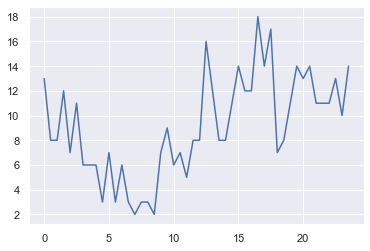

In [218]:
import math
year=2014
transport_type="bicycle"



grouped_30min=df_1min_speed.set_index(["time_system_ts"]).resample("30Min").sum()
grouped_30min["count_transport"]=grouped_30min[transport_type].apply(lambda x: math.ceil(x/30))
grouped_30min=grouped_30min.reset_index()
grouped_30min["minutes"]=grouped_30min["time_system_ts"].dt.hour*60+grouped_30min["time_system_ts"].dt.minute
grouped_counts=pd.DataFrame(grouped_30min.groupby(["minutes"]).sum()["count_transport"])
grouped_counts.index=grouped_counts.index/60
plt.plot(grouped_counts)

In [223]:
def transport_counts(df_1min_speed,transport_type,year):
    df_1min_speed=df_1min_speed[df_1min_speed["time_system_ts"].dt.year==year]
    grouped_30min=df_1min_speed.set_index(["time_system_ts"]).resample("30Min").sum()
    grouped_30min["count_transport"]=grouped_30min[transport_type].apply(lambda x: math.ceil(x/30))
    grouped_30min=grouped_30min.reset_index()
    grouped_30min["minutes"]=grouped_30min["time_system_ts"].dt.hour*60+grouped_30min["time_system_ts"].dt.minute
    grouped_counts=pd.DataFrame(grouped_30min.groupby(["minutes"]).sum()["count_transport"])
    grouped_counts.index=grouped_counts.index/60
    return grouped_counts

In [226]:
transport_counts(df_1min_speed,"car",2015)

,count_transport
minutes,
0.0,5
0.5,3
1.0,2
1.5,2
2.0,2
2.5,2
3.0,1
3.5,0
4.0,1


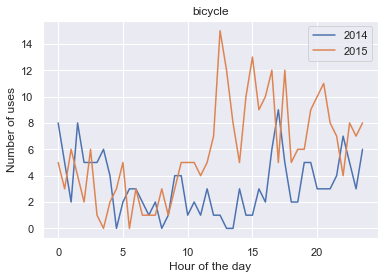

In [221]:
transport_counts(df_1min_speed,"bicycle",2014)
transport_counts(df_1min_speed,"bicycle",2015)

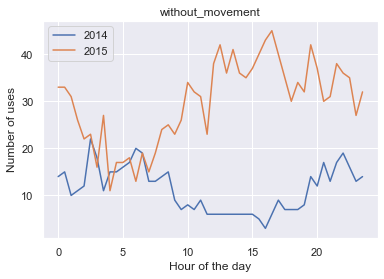

In [222]:
transport_counts(df_1min_speed,"without_movement",2014)
transport_counts(df_1min_speed,"without_movement",2015)

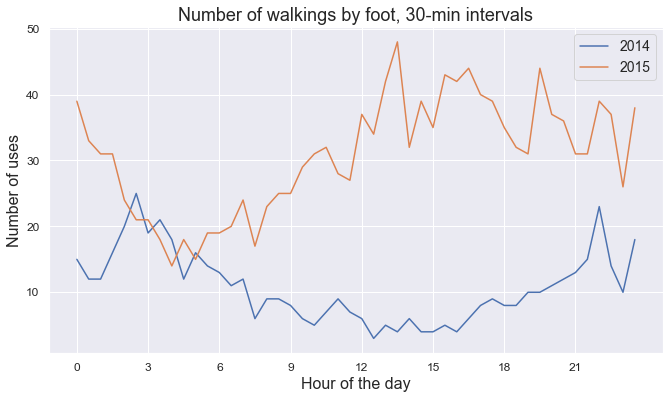

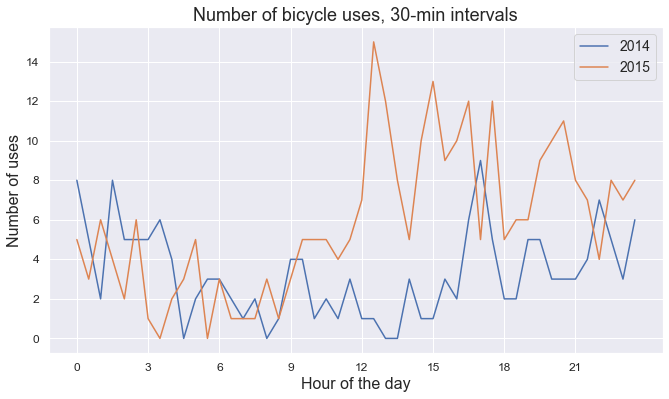

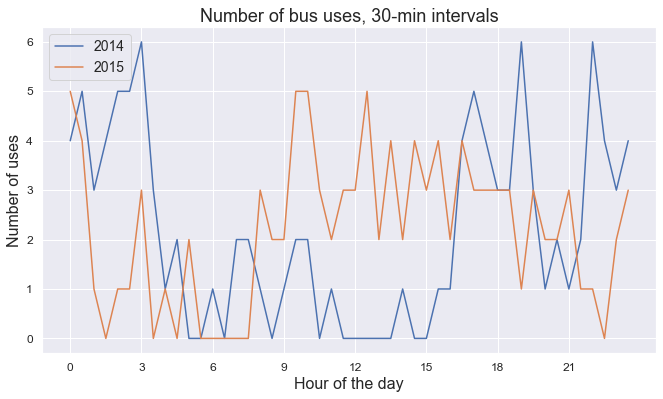

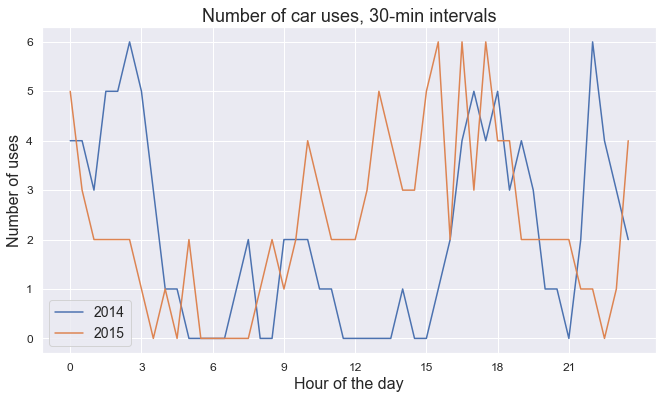

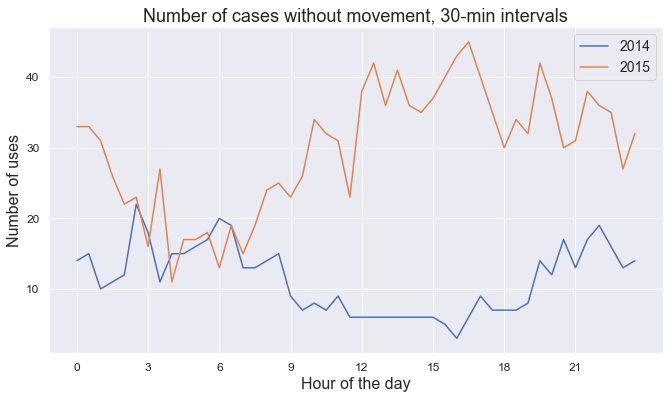

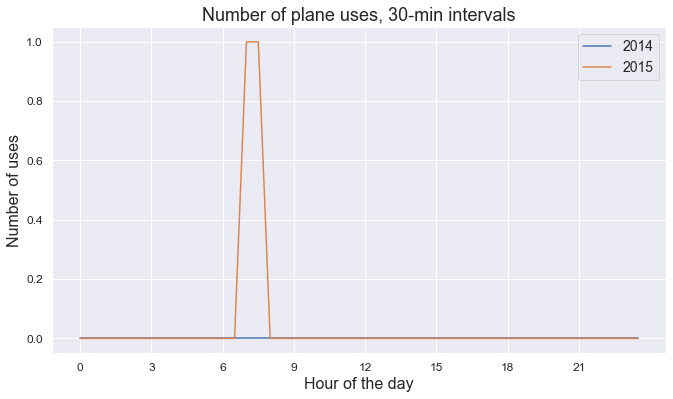

In [230]:
for transport_type,transport_name in zip(["pedestrian","bicycle","bus","car","without_movement","plane"],["walkings by foot","bicycle uses","bus uses","car uses","cases without movement","plane uses"]):
    plt.figure(figsize=(11,6))
    plt.plot(transport_counts(df_1min_speed,transport_type,2014),label=2014)
    plt.plot(transport_counts(df_1min_speed,transport_type,2015),label=2015)
    plt.ylabel("Number of uses",fontsize=16)
    plt.xlabel("Hour of the day",fontsize=16)
    plt.title("Number of "+transport_name+", 30-min intervals",fontsize=18)
    plt.xticks(np.arange(0,24,3),fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=14)
    plt.savefig(r"C:\Users\Kasutaja\OneDrive - Tartu Ülikool\Geography communication and spatial mobility\Assignment 3\Plots\{}.svg".format(transport_type))